# Инициализация

Загружаем библиотеки необходимые для выполнения кода ноутбука.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
%matplotlib inline
%config InlineBackend.figure_format = 'png'
%config InlineBackend.figure_format = 'retina'

# === ЗАДАЧА 1 ===

## Исследование и анализ данных о клиентах

Загружаем первичные данные из файла:
- train_ver2.csv

In [3]:
df = pd.read_csv("train_ver2.csv")
len_df = len(df)
print(f"Исходный размер выборки: {len_df}")
df.sample(15)

/tmp/ipykernel_6465/2315631876.py:1: DtypeWarning: Columns (5,8,11,15) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("train_ver2.csv")


Исходный размер выборки: 13647309


,fecha_dato,ncodpers,ind_empleado,pais_residencia,sexo,age,fecha_alta,ind_nuevo,antiguedad,indrel,...,ind_hip_fin_ult1,ind_plan_fin_ult1,ind_pres_fin_ult1,ind_reca_fin_ult1,ind_tjcr_fin_ult1,ind_valo_fin_ult1,ind_viv_fin_ult1,ind_nomina_ult1,ind_nom_pens_ult1,ind_recibo_ult1
10182217,2016-02-28,1441295,N,ES,V,30,2015-09-02,1.0,6,1.0,...,0,0,0,0,0,0,0,1.0,1.0,1
8671048,2015-12-28,145385,N,ES,V,51,1999-10-25,0.0,194,1.0,...,1,0,0,1,1,0,0,1.0,1.0,1
9677203,2016-01-28,668512,N,ES,H,43,2007-01-15,0.0,108,1.0,...,0,0,0,0,0,0,0,0.0,0.0,0
8397193,2015-12-28,1297962,N,ES,H,41,2014-08-20,0.0,16,1.0,...,0,0,0,0,0,0,0,0.0,0.0,0
8260151,2015-12-28,957752,N,ES,V,24,2011-10-10,0.0,50,1.0,...,0,0,0,1,0,0,0,0.0,0.0,0
7169602,2015-10-28,708436,N,ES,V,71,2007-08-03,0.0,98,1.0,...,0,0,0,0,0,0,0,0.0,0.0,0
4723318,2015-08-28,1022078,N,ES,V,38,2012-07-04,0.0,37,1.0,...,0,0,0,0,0,0,0,0.0,0.0,0
8387532,2015-12-28,1300848,N,ES,H,21,2014-09-01,0.0,15,1.0,...,0,0,0,0,0,0,0,0.0,0.0,0
8509136,2015-12-28,300122,N,ES,V,43,2001-11-22,0.0,169,1.0,...,0,0,0,0,0,0,0,0.0,0.0,0
1956468,2015-04-28,483078,N,ES,H,45,2004-07-29,0.0,132,1.0,...,0,0,0,0,0,0,0,0.0,0.0,0


### Описание данных из файла train_ver2.csv:

У вас есть данные о поведении клиентов банка за 1,5 года — на их основе вы предскажете, какие новые продукты купят клиенты. Данные начинаются с 28 января 2015 года и содержат ежемесячные записи о продуктах, которые имеет клиент, например, «кредитная карта», «сберегательный счет» и т. д. Вы сможете предсказать, какие дополнительные продукты клиент получит в месяце 2016 года. Эти продукты представляют собой столбы с именами ind_(xyz)_ult1, которые идут с 25-ой по 48-ю колонку в обучающих данных.

```
fecha_dato	        Колонка для разделения таблицы
ncodpers	        Идентификатор пользователя
ind_empleado	        Статус занятости:
                            - A — трудоустроен
                            - B — безработный, раньше работал
                            - F — иждивенец
                            - N — безработный
                            - P — пассивный (статус не определён)
pais_residencia	        Страна резидентства
sexo	                Пол
age	                Возраст
fecha_alta	        Дата, когда клиент впервые заключил договор в банке
ind_nuevo	        1, если клиент зарегистрировался за последние 6 месяцев
antiguedad	        Стаж клиента (в месяцах)
indrel	                1 — первичный клиент
                        99 — первичный клиент в течении месяца, но не в конце
ult_fec_cli_1t	        Последняя дата, когда клиент был премиальным
indrel_1mes	        Тип клиента в начале месяца:
                            - 1 — премиальный
                            - 2 — собственник
                            - P — потенциальный
                            - 3 — раньше был премиальным
                            - 4 — раньше был собственником
tiprel_1mes	        Тип клиента в начале месяца:
                            - A — активный
                            - I — неактивный
                            - P — бывший
                            - R — потенциальный
indresi	                Если страна проживания совпадает со страной банка
indext	                Если страна рождения клиента отличается от страны банка
conyuemp	        1, если клиент супруг(а) работника
canal_entrada	        Канал, по которому пришел пользователь
indfall	                Индекс актуальности счёта (англ. Deceased index, N/S)
tipodom	                Тип адреса (1 — основной адрес)
cod_prov	        Код провинции (адреса клиента)
nomprov	                Имя провинции
ind_actividad_cliente	Активность пользователя (1 — активный, 0 — неактивный)
renta	                Доход домохозяйства
segmento		Сегментация: 1 — VIP, 2 — Обыкновенные 3 — выпускники колледжей
ind_ahor_fin_ult1	Сберегательный счёт
ind_aval_fin_ult1	Банковская гарантия
ind_cco_fin_ult1	Текущие счета
ind_cder_fin_ult1	Деривативный счёт
ind_cno_fin_ult1	Зарплатный проект
ind_ctju_fin_ult1	Детский счёт
ind_ctma_fin_ult1	Особый счёт 3
ind_ctop_fin_ult1	Особый счёт
ind_ctpp_fin_ult1	Особый счёт 2
ind_deco_fin_ult1	Краткосрочный депозит
ind_deme_fin_ult1	Среднесрочный депозит
ind_dela_fin_ult1	Долгосрочный депозит
ind_ecue_fin_ult1	Цифровой счёт
ind_fond_fin_ult1	Денежный средства
ind_hip_fin_ult1	Ипотека
ind_plan_fin_ult1	Пенсионный план
ind_pres_fin_ult1	Кредит
ind_reca_fin_ult1	Налоговый счёт
ind_tjcr_fin_ult1	Кредитная карта
ind_valo_fin_ult1	Ценные бумаги
ind_viv_fin_ult1	Домашний счёт
ind_nomina_ult1		Аккаунт для выплаты зарплаты
ind_nom_pens_ult1	Аккаунт для пенсионных обязательств
ind_recibo_ult1		Дебетовый аккаунт
```

### Обзор данных

Проверяем данные, есть ли с ними явные проблемы.

In [4]:
df.info(verbose=True, show_counts=True)
# видно, что имеются колонки с большим кол-вом пустых значений, например 'ult_fec_cli_1t' и 'conyuemp'

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13647309 entries, 0 to 13647308
Data columns (total 48 columns):
 #   Column                 Non-Null Count     Dtype  
---  ------                 --------------     -----  
 0   fecha_dato             13647309 non-null  object 
 1   ncodpers               13647309 non-null  int64  
 2   ind_empleado           13619575 non-null  object 
 3   pais_residencia        13619575 non-null  object 
 4   sexo                   13619505 non-null  object 
 5   age                    13647309 non-null  object 
 6   fecha_alta             13619575 non-null  object 
 7   ind_nuevo              13619575 non-null  float64
 8   antiguedad             13647309 non-null  object 
 9   indrel                 13619575 non-null  float64
 10  ult_fec_cli_1t         24793 non-null     object 
 11  indrel_1mes            13497528 non-null  object 
 12  tiprel_1mes            13497528 non-null  object 
 13  indresi                13619575 non-null  object 
 14  

In [5]:
# выделим в отдельные списки колонки по информациям о пользователе и банковсикх продуктах
user_columns = df.columns[1:24]
bank_columns = df.columns[24:]

print(f"user_columns: {user_columns}")
print(f"bank_columns: {bank_columns}")

user_columns: Index(['ncodpers', 'ind_empleado', 'pais_residencia', 'sexo', 'age',
       'fecha_alta', 'ind_nuevo', 'antiguedad', 'indrel', 'ult_fec_cli_1t',
       'indrel_1mes', 'tiprel_1mes', 'indresi', 'indext', 'conyuemp',
       'canal_entrada', 'indfall', 'tipodom', 'cod_prov', 'nomprov',
       'ind_actividad_cliente', 'renta', 'segmento'],
      dtype='object')
bank_columns: Index(['ind_ahor_fin_ult1', 'ind_aval_fin_ult1', 'ind_cco_fin_ult1',
       'ind_cder_fin_ult1', 'ind_cno_fin_ult1', 'ind_ctju_fin_ult1',
       'ind_ctma_fin_ult1', 'ind_ctop_fin_ult1', 'ind_ctpp_fin_ult1',
       'ind_deco_fin_ult1', 'ind_deme_fin_ult1', 'ind_dela_fin_ult1',
       'ind_ecue_fin_ult1', 'ind_fond_fin_ult1', 'ind_hip_fin_ult1',
       'ind_plan_fin_ult1', 'ind_pres_fin_ult1', 'ind_reca_fin_ult1',
       'ind_tjcr_fin_ult1', 'ind_valo_fin_ult1', 'ind_viv_fin_ult1',
       'ind_nomina_ult1', 'ind_nom_pens_ult1', 'ind_recibo_ult1'],
      dtype='object')


In [6]:
# проверим колонки на NaN значения
df.columns[df.isna().any()].tolist()

['ind_empleado',
 'pais_residencia',
 'sexo',
 'fecha_alta',
 'ind_nuevo',
 'indrel',
 'ult_fec_cli_1t',
 'indrel_1mes',
 'tiprel_1mes',
 'indresi',
 'indext',
 'conyuemp',
 'canal_entrada',
 'indfall',
 'tipodom',
 'cod_prov',
 'nomprov',
 'ind_actividad_cliente',
 'renta',
 'segmento',
 'ind_nomina_ult1',
 'ind_nom_pens_ult1']

In [7]:
# посчитаем кол-во уникальных пользователей
users_count = df["ncodpers"].nunique()

print(f"Кол-во уникальных пользователей: {users_count}")
print(f"Процент от числа взаимодействий: {int(100*(users_count/len(df)))}%")

Кол-во уникальных пользователей: 956645
Процент от числа взаимодействий: 7%


In [8]:
df["ncodpers"] = df["ncodpers"].astype(int)
df["ncodpers"].describe().loc[["count", "min", "max"]]
# идентификаторы самого первого и последнего пользователя банка

count    13647309.0
min         15889.0
max       1553689.0
Name: ncodpers, dtype: float64

In [9]:
# проверка колонок с датами
df["fecha_dato"].astype("date32[pyarrow]").describe()
# min = 2015-01-28
# max = 2016-05-28
# тут все корректно, пропусков нет

count      13647309
mean     2015-10-19
min      2015-01-28
25%      2015-06-28
50%      2015-10-28
75%      2016-02-28
max      2016-05-28
Name: fecha_dato, dtype: object

In [10]:
df["fecha_dato"].nunique()
# всего 17 месяцев, значит, в среднем в месяц пользователи взаимодействовали с банком ~800 тыс раз

17

In [11]:
df[df[["fecha_dato", "ncodpers"]].duplicated()]
# дубликатов по паре месяц-юзер нет, тут все корректно

,fecha_dato,ncodpers,ind_empleado,pais_residencia,sexo,age,fecha_alta,ind_nuevo,antiguedad,indrel,...,ind_hip_fin_ult1,ind_plan_fin_ult1,ind_pres_fin_ult1,ind_reca_fin_ult1,ind_tjcr_fin_ult1,ind_valo_fin_ult1,ind_viv_fin_ult1,ind_nomina_ult1,ind_nom_pens_ult1,ind_recibo_ult1


In [12]:
df["fecha_alta"].astype("date32[pyarrow]").describe()
# min = 1995-01-16
# max = 2016-05-31
# тут все корректно, пропусков нет

count      13619575
mean     2009-02-09
min      1995-01-16
25%      2004-04-23
50%      2011-09-01
75%      2013-10-18
max      2016-05-31
Name: fecha_alta, dtype: object

In [13]:
df["ult_fec_cli_1t"].astype("date32[pyarrow]").describe()

# min = 2015-07-01
# max = 2016-05-30

# По этому признаку "Последняя дата, когда клиент был премиальным" почти все значния с пропусками.
# Скорее всего, такой призак не окажет эффекта, поэтому удалим этот столбец.

count         24793
mean     2015-11-19
min      2015-07-01
25%      2015-08-03
50%      2015-11-18
75%      2016-02-10
max      2016-05-30
Name: ult_fec_cli_1t, dtype: object

In [14]:
# удаляем столбец "Последняя дата, когда клиент был премиальным"
df = df.drop(columns="ult_fec_cli_1t")

In [15]:
# проанализируем персональные данные пользователей

df.drop_duplicates(["ncodpers"], keep="last")["sexo"].value_counts()
# распределение полов примерно одинаково

sexo
V    515572
H    434037
Name: count, dtype: int64

In [16]:
# уберем из данных клиентов, у которых не указан пол (это может быть важным признаком)
df = df[~pd.isna(df["sexo"])].reset_index(drop=True)

print(f"Новый размер выборки: {len(df)}")
print(f"Процент от исходного: {int(100*(len(df)/len_df))}%")

Новый размер выборки: 13619505
Процент от исходного: 99%


In [17]:
# распределение по возрастам
df["age"] = df["age"].astype(int)
df.drop_duplicates(["ncodpers"], keep="last")["age"].describe()

# min = 2
# max = 164

# видим нереалистичные значения для возраста

count    949609.000000
mean         40.154098
std          17.170328
min           2.000000
25%          25.000000
50%          38.000000
75%          50.000000
max         164.000000
Name: age, dtype: float64

<Axes: ylabel='Density'>

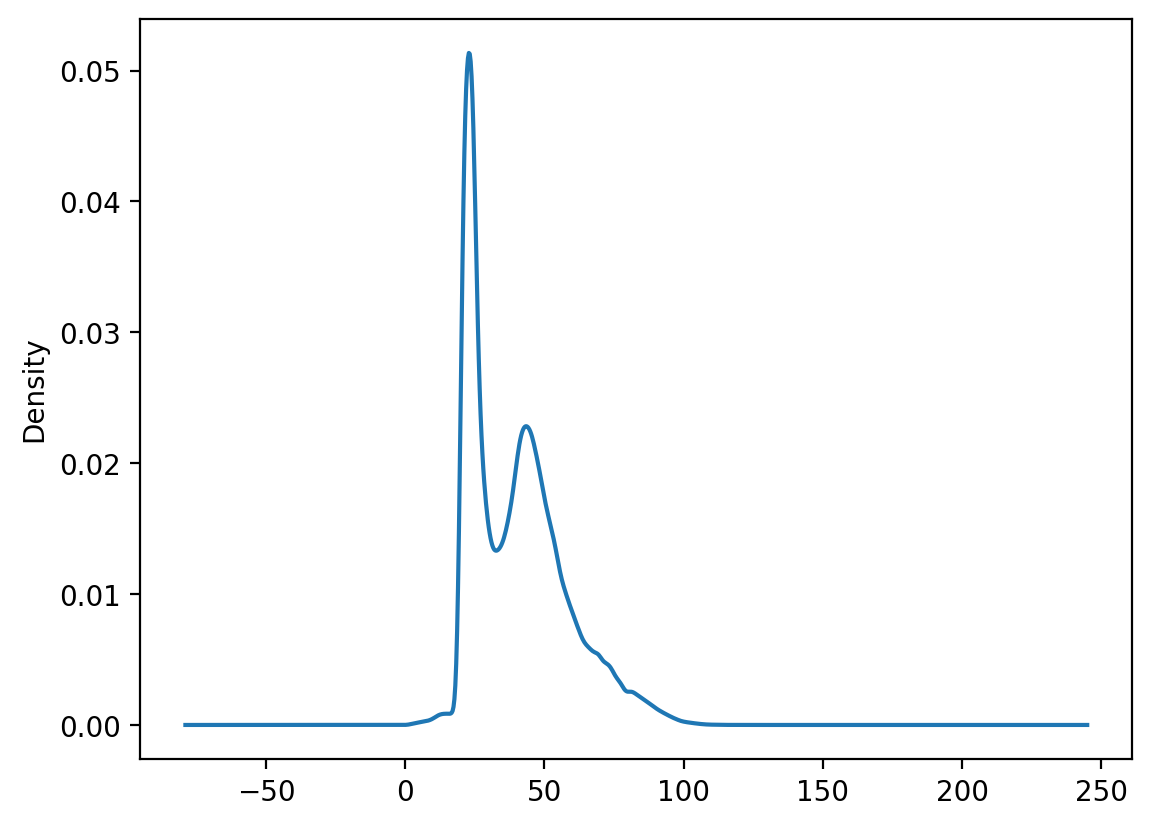

In [18]:
# проверим распределение по возрасту на графике
df.drop_duplicates(["ncodpers"], keep="last").age.plot(kind="kde")

In [19]:
# оставим только пользователей с возрастом от 18 до 60 лет
df = df[df["age"] <= 60].reset_index(drop=True)
df = df[df["age"] >= 18].reset_index(drop=True)

print(f"Новый размер выборки: {len(df)}")
print(f"Процент от исходного: {int(100*(len(df)/len_df))}%")

users_count = df["ncodpers"].nunique()

print(f"Кол-во уникальных пользователей: {users_count}")
print(f"Процент от числа взаимодействий: {int(100*(users_count/len(df)))}%")

Новый размер выборки: 11765511
Процент от исходного: 86%
Кол-во уникальных пользователей: 827541
Процент от числа взаимодействий: 7%


<Axes: ylabel='Density'>

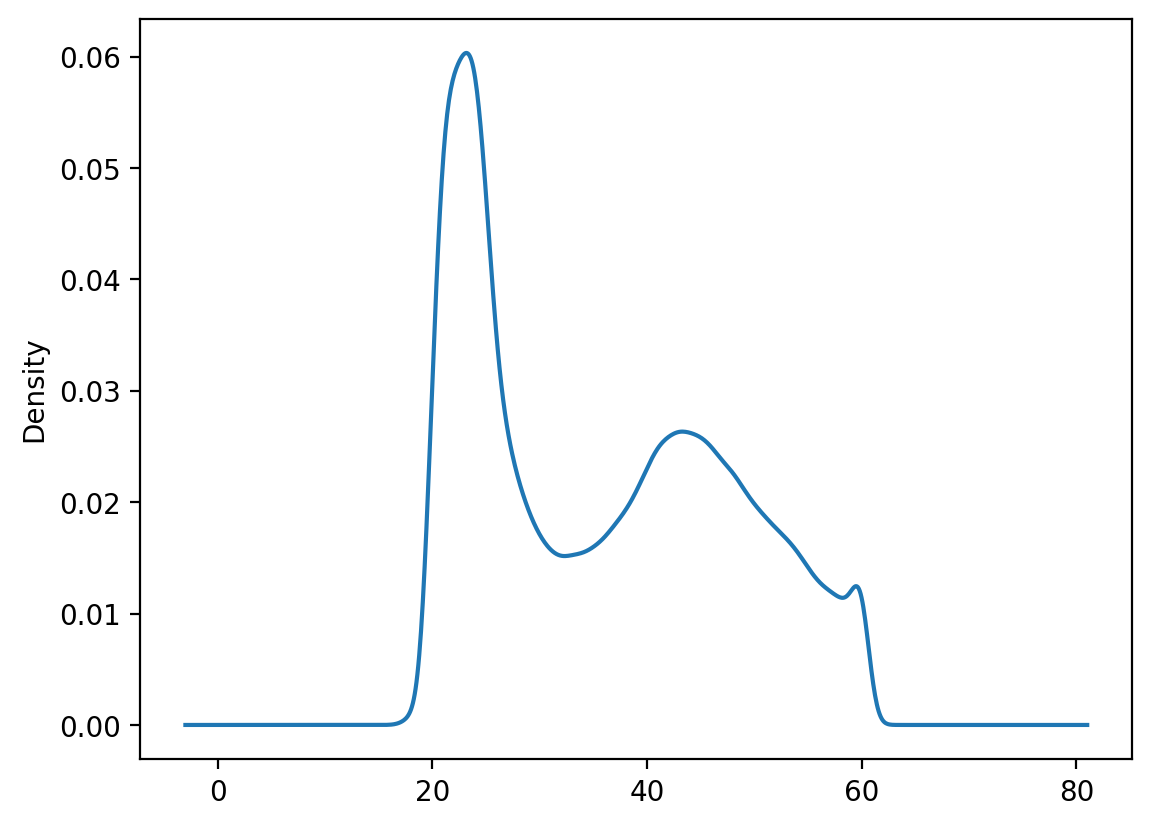

In [20]:
# итоговое распределение по возрасту на графике
df.drop_duplicates(["ncodpers"], keep="last").age.plot(kind="kde")

In [21]:
df.drop_duplicates(["ncodpers"], keep="last")["ind_empleado"].value_counts()
# По статусу занятости почти все пользователи безработные (возможно из-за некорректного заполнения данных в анкете).
# Такой признак не окажет эффекта, поэтому удалим этот столбец.

ind_empleado
N    827046
B       204
F       146
A       144
S         1
Name: count, dtype: int64

In [22]:
# удаляем столбец с этим признаком
df = df.drop(columns="ind_empleado")

In [23]:
df.drop_duplicates(["ncodpers"], keep="last")["pais_residencia"].value_counts()
# по Стране резидентства почти все пользователи из ES (Испания).
# Такой признак не окажет эффекта, поэтому удалим этот столбец.

pais_residencia
ES    824131
FR       256
DE       254
GB       251
AR       224
       ...  
MM         1
GE         1
JM         1
GA         1
DJ         1
Name: count, Length: 115, dtype: int64

In [24]:
# удаляем столбец с этим признаком
df = df.drop(columns="pais_residencia")

In [25]:
df.drop_duplicates(["ncodpers"], keep="last")["ind_nuevo"].value_counts()
# клиентов, зарегистрированных за последние 6 месяцев - 5%. ОК.

ind_nuevo
0.0    787730
1.0     39811
Name: count, dtype: int64

In [26]:
# Стаж клиента (в месяцах)

df["antiguedad"] = df["antiguedad"].astype(int)
df.drop_duplicates(["ncodpers"], keep="last")["antiguedad"].describe()

# min = -999999
# max = 256

# видим нереалистичные минимальные значения

count    827541.000000
mean         69.237689
std        1556.063541
min     -999999.000000
25%          20.000000
50%          45.000000
75%         118.000000
max         256.000000
Name: antiguedad, dtype: float64

<Axes: ylabel='Density'>

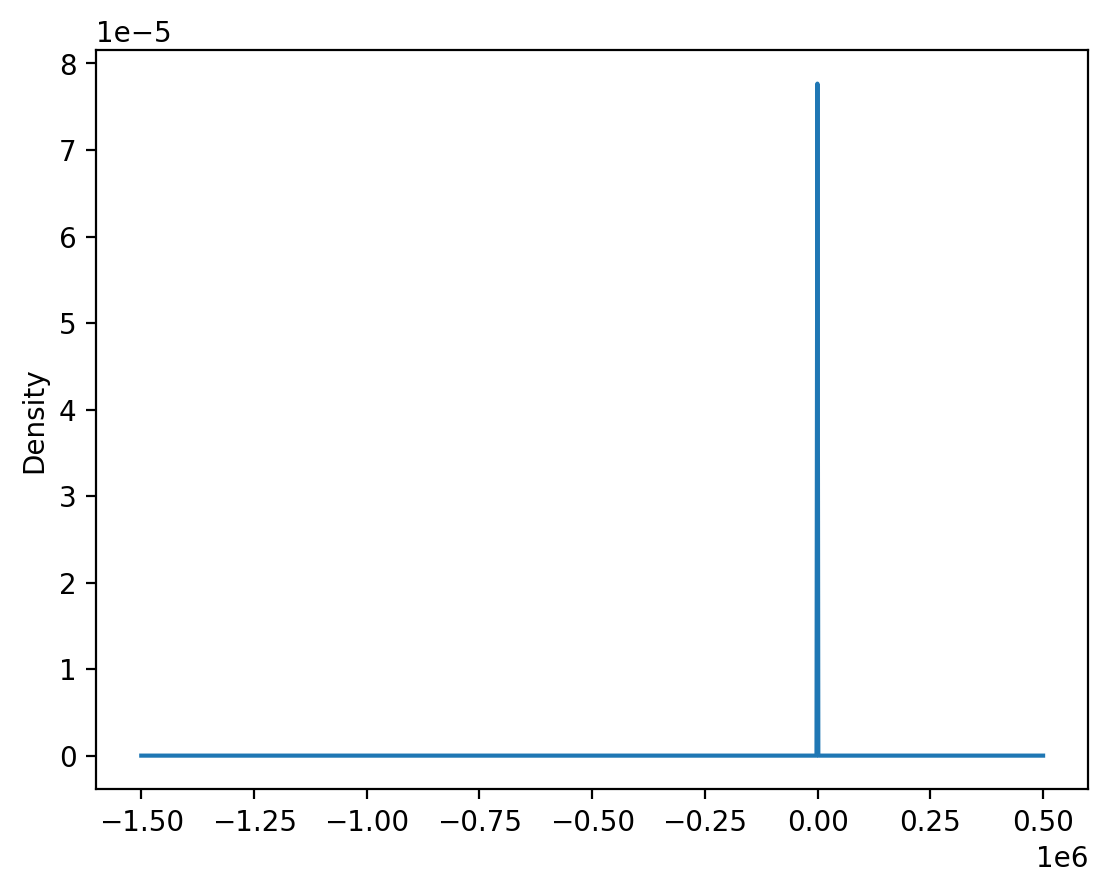

In [27]:
# проверим распределение по стажу
df.drop_duplicates(["ncodpers"], keep="last").antiguedad.plot(kind="kde")

In [28]:
# осталяем только пользователей со стажем >= 0
df = df[df["antiguedad"] >= 0].reset_index(drop=True)

print(f"Новый размер выборки: {len(df)}")
print(f"Процент от исходного: {int(100*(len(df)/len_df))}%")

users_count = df["ncodpers"].nunique()

print(f"Кол-во уникальных пользователей: {users_count}")
print(f"Процент от числа взаимодействий: {int(100*(users_count/len(df)))}%")

Новый размер выборки: 11765490
Процент от исходного: 86%
Кол-во уникальных пользователей: 827540
Процент от числа взаимодействий: 7%


<Axes: ylabel='Density'>

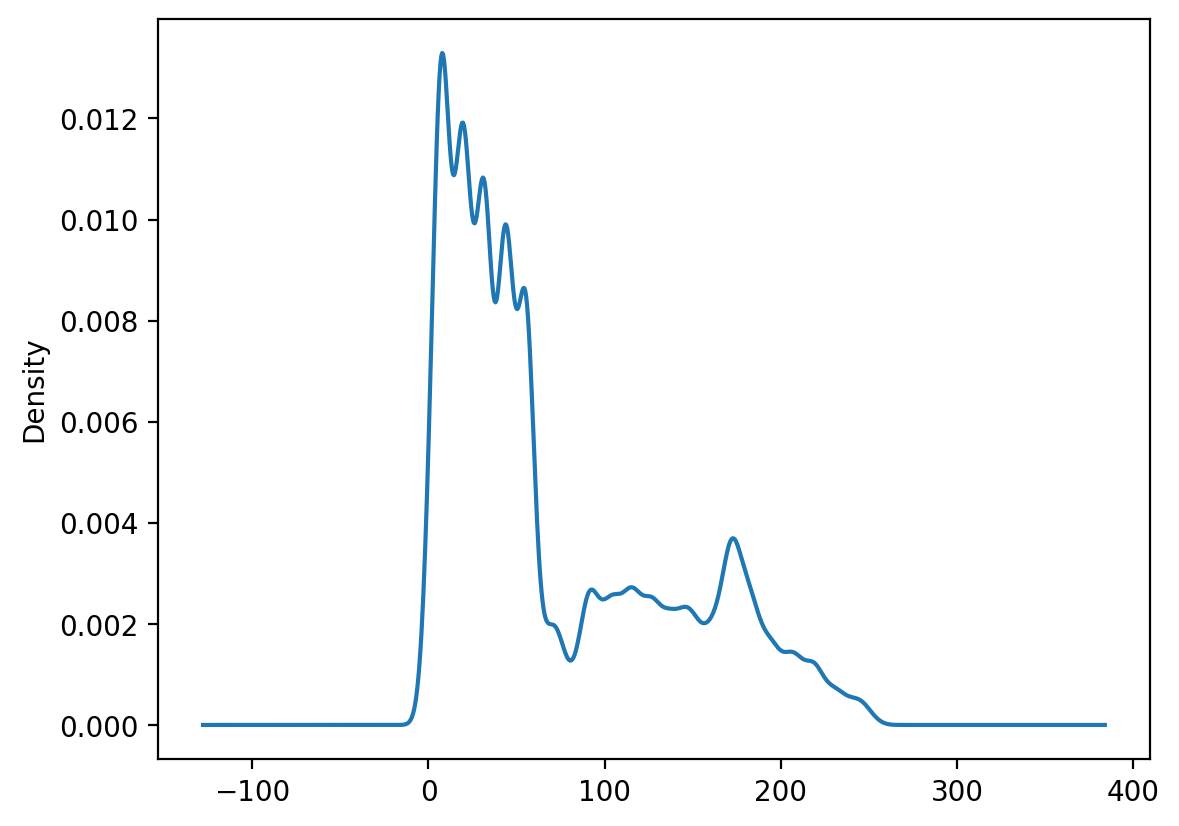

In [29]:
# итоговое распределение по стажу
df.drop_duplicates(["ncodpers"], keep="last").antiguedad.plot(kind="kde")

In [30]:
df.drop_duplicates(["ncodpers"], keep="last")["indrel"].value_counts()
# первичных клиентов - 98%. Этот признак также можно не учитывать

indrel
1.0     810547
99.0     16993
Name: count, dtype: int64

In [31]:
# удаляем столбец 'indrel'
df = df.drop(columns="indrel")

In [32]:
df.drop_duplicates(["ncodpers"], keep="last")["indrel_1mes"].value_counts()
# по этому признаку подавляющее число премиальных клиентов в начале месяца, поэтому избавимся и от этого столбца

indrel_1mes
1.0    390675
1.0    256120
1      172719
3.0       255
3         233
3.0       194
P          84
2          47
2.0        38
2.0        29
4.0        15
4.0        13
4           7
Name: count, dtype: int64

In [33]:
# удаляем столбец 'indrel_1mes'
df = df.drop(columns="indrel_1mes")

In [34]:
df["tiprel_1mes"].value_counts()
# По этому признаку "Тип клиента в начале месяца" выделяются клиенты Неактивные и Активные, их примерно одинаковое кол-во.
# Отнесем клиентов с другими типами к неактивным.

tiprel_1mes
I    6404084
A    5239310
P       4047
R        714
N          2
Name: count, dtype: int64

In [35]:
# Отнесем клиентов с другими типами и с неизвестным типом NaN к неактивным
df["tiprel_1mes"][df["tiprel_1mes"] == "P"] = "I"
df["tiprel_1mes"][df["tiprel_1mes"] == "R"] = "I"
df["tiprel_1mes"][df["tiprel_1mes"] == "N"] = "I"
df["tiprel_1mes"][df["tiprel_1mes"].isna()] = "I"
df["tiprel_1mes"].value_counts()

/tmp/ipykernel_6465/3353118602.py:2: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  df["tiprel_1mes"][df["tiprel_1mes"] == "P"] = "I"
/tmp/ipykernel_6465/3353118602.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a sli

tiprel_1mes
I    6526180
A    5239310
Name: count, dtype: int64

In [36]:
df.drop_duplicates(["ncodpers"], keep="last")["indresi"].value_counts()
# по этому признаку "Если страна проживания совпадает со страной банка"
# подавляющее число клиентов со значением "S", поэтому избавимся от этого бесмысленного столбца.

indresi
S    824130
N      3410
Name: count, dtype: int64

In [37]:
# удаляем столбец 'indresi'
df = df.drop(columns="indresi")

In [38]:
df.drop_duplicates(["ncodpers"], keep="last")["indext"].value_counts()
# по этому признаку "Если страна рождения клиента отличается от страны банка" 5% клиентов имеют значение "S". ОК.

indext
N    782760
S     44780
Name: count, dtype: int64

In [39]:
df.drop_duplicates(["ncodpers"], keep="last")["conyuemp"].value_counts()
# по этому признаку очень мало непустых значений, поэтому можно его удалять

conyuemp
N    89
S     1
Name: count, dtype: int64

In [40]:
# удаляем столбец 'conyuemp'
df = df.drop(columns="conyuemp")

In [41]:
df.drop_duplicates(["ncodpers"], keep="last")["canal_entrada"].value_counts()
# по этому признаку "Канал, по которому пришел пользователь" много разнообразных значений

canal_entrada
KHE    252757
KFC    171542
KAT    159153
KHQ     75910
KHM     30896
        ...  
KDI         1
KDB         1
KHR         1
KGU         1
KDL         1
Name: count, Length: 160, dtype: int64

In [42]:
# Выведем их в виде списка
df.drop_duplicates(["ncodpers"], keep="last")["canal_entrada"].unique()

array(['KAJ', 'KFC', 'KAT', 'KAH', 'KAA', 'KHN', 'KAE', 'KBF', 'KAP', nan,
       'KEN', 'KAR', 'KFA', 'KAG', 'KHK', 'KAI', 'KAQ', 'KBH', '007',
       'KCH', 'KBZ', 'KCI', '013', 'KED', 'KAY', 'KEY', 'KAB', 'KEJ',
       'KHM', 'KAF', 'KHL', 'KFD', 'KGV', 'KAZ', 'KHE', 'KHD', 'KFP',
       'KAO', 'KFN', 'KCC', 'KFT', 'KAS', 'KAW', 'KDX', 'KAC', 'RED',
       'KCF', 'KDR', 'KCM', 'KEW', 'KHF', 'KHO', 'KHC', 'KFS', 'KFH',
       'KFF', 'KGY', 'KGX', 'KFJ', 'KFG', 'KFU', 'KEZ', 'KAL', 'KDF',
       'KBO', 'KHQ', 'KCG', 'KDT', 'KDS', 'KDY', 'KEA', 'KDA', 'KCN',
       'KCD', 'KAD', 'KES', 'KDD', 'KBG', 'KDG', 'KDU', 'KCE', 'KAM',
       'KBS', 'KBB', 'KCQ', 'KDM', 'KFR', 'KHP', 'KBR', 'KEQ', 'KFL',
       'KCK', 'KCB', 'KAK', 'KEO', 'KDO', 'KBW', 'KDH', 'KBL', 'KFI',
       'KEK', 'KCL', 'KFK', 'KDE', 'KDZ', 'KEL', 'KDV', 'KEC', 'KBU',
       'KDC', 'KCR', 'K00', 'KFV', 'KGW', 'KBM', 'KFB', 'KFM', 'KDL',
       'KEM', 'KAN', 'KEE', 'KBQ', 'KDW', 'KGU', 'KCJ', 'KEG', 'KBY',
       'KHR', '

In [43]:
# nan значения переделаем в строку "NAN"
df["canal_entrada"][df["canal_entrada"].isna()] = "NAN"

/tmp/ipykernel_6465/259348266.py:2: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  df["canal_entrada"][df["canal_entrada"].isna()] = "NAN"
/tmp/ipykernel_6465/259348266.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a

In [44]:
df.drop_duplicates(["ncodpers"], keep="last")["indfall"].value_counts()
# по этому признаку "Индекс актуальности счёта (англ. Deceased index, N/S)" почти все значения "N". МОжно удалять этот столбец.

indfall
N    826982
S       558
Name: count, dtype: int64

In [45]:
# удаляем столбец 'indfall'
df = df.drop(columns="indfall")

In [46]:
df.drop_duplicates(["ncodpers"], keep="last")["tipodom"].value_counts()
# по этому признаку "Тип адреса (1 — основной адрес)" все значения "1.0". МОжно удалять этот столбец.

tipodom
1.0    827540
Name: count, dtype: int64

In [47]:
# удаляем столбец 'tipodom'
df = df.drop(columns="tipodom")

In [48]:
df.drop_duplicates(["ncodpers"], keep="last")["cod_prov"].value_counts()
# по этому признаку "Код провинции (адреса клиента)" много разнообразных значений.

cod_prov
28.0    249531
8.0      79677
46.0     43129
41.0     37280
15.0     27073
30.0     26826
29.0     22508
3.0      20291
50.0     19976
11.0     18448
36.0     18204
33.0     16428
35.0     15233
47.0     14389
6.0      12529
45.0     11880
18.0     11341
37.0     10257
48.0      9837
39.0      9465
14.0      9167
7.0       8375
10.0      8323
21.0      7735
13.0      7679
2.0       7466
43.0      7021
12.0      6756
9.0       6015
17.0      5877
27.0      5449
32.0      5401
31.0      5156
25.0      5117
26.0      4967
24.0      4922
38.0      4600
19.0      4314
23.0      4122
4.0       4035
20.0      4022
16.0      3614
49.0      3215
34.0      3081
22.0      2587
40.0      2569
5.0       2405
1.0       2247
44.0      1466
42.0      1127
52.0       543
51.0       454
Name: count, dtype: int64

In [49]:
# Выведем их в виде списка
df.drop_duplicates(["ncodpers"], keep="last")["cod_prov"].unique()

array([47., 39., 41., 15.,  2.,  8., 28., 49., 46., 45., 48., 33., 29.,
       35., 20.,  4., 11., 37., 36., 18., 22., 38., 26.,  3., 32., 50.,
       21., 30., 19., 14., 34., 24., 27.,  7.,  6., 44.,  9., 16., 13.,
       25., 17., 31., 12., 43.,  5.,  1., nan, 42., 40., 23., 10., 51.,
       52.])

In [50]:
# nan значения сделаем 0 и переведем все значения в тип int
df["cod_prov"][df["cod_prov"].isna()] = 0
df["cod_prov"] = df["cod_prov"].astype(int)
df.drop_duplicates(["ncodpers"], keep="last")["cod_prov"].unique()

/tmp/ipykernel_6465/1839150170.py:2: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  df["cod_prov"][df["cod_prov"].isna()] = 0
/tmp/ipykernel_6465/1839150170.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from 

array([47, 39, 41, 15,  2,  8, 28, 49, 46, 45, 48, 33, 29, 35, 20,  4, 11,
       37, 36, 18, 22, 38, 26,  3, 32, 50, 21, 30, 19, 14, 34, 24, 27,  7,
        6, 44,  9, 16, 13, 25, 17, 31, 12, 43,  5,  1,  0, 42, 40, 23, 10,
       51, 52])

<Axes: ylabel='Density'>

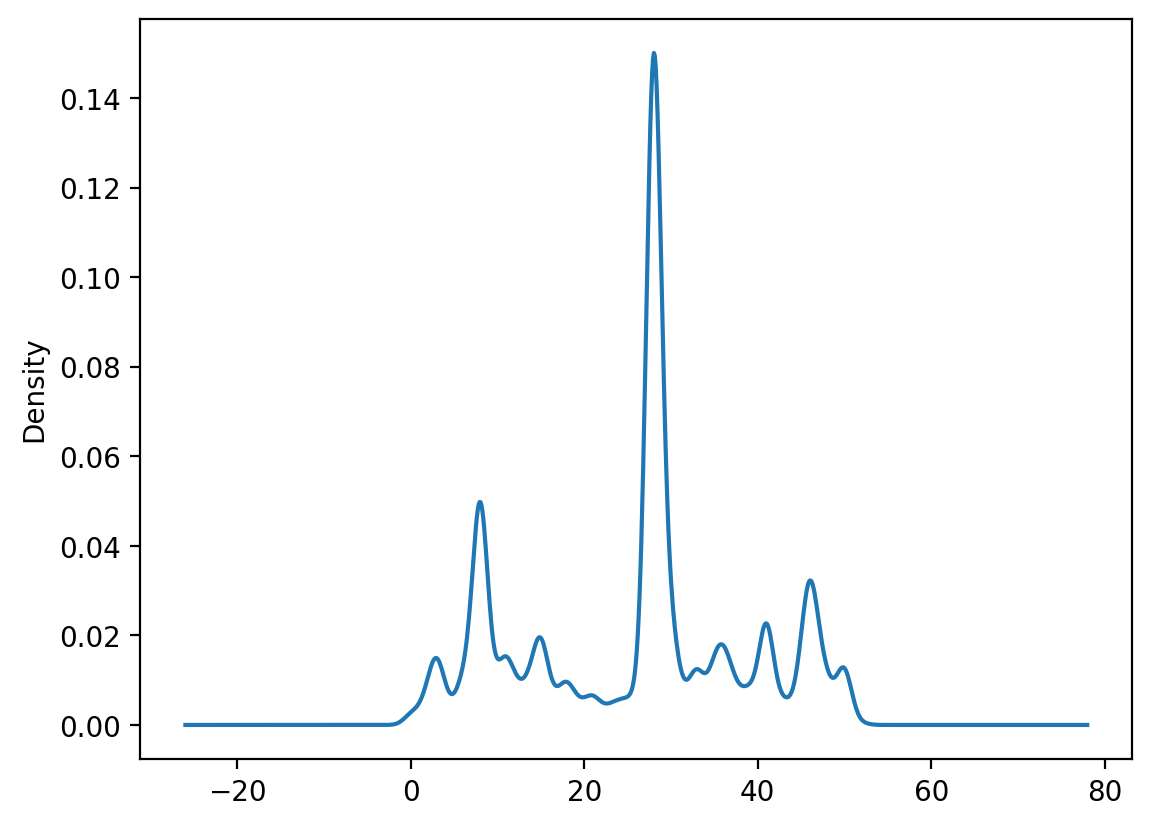

In [51]:
# проверим распределение по коду провинции
df.drop_duplicates(["ncodpers"], keep="last").cod_prov.plot(kind="kde")

In [52]:
df.drop_duplicates(["ncodpers"], keep="last")["nomprov"].value_counts()
# по этому признаку "Имя провинции" много разнообразных значений.

nomprov
MADRID                    249531
BARCELONA                  79677
VALENCIA                   43129
SEVILLA                    37280
CORUÑA, A                  27073
MURCIA                     26826
MALAGA                     22508
ALICANTE                   20291
ZARAGOZA                   19976
CADIZ                      18448
PONTEVEDRA                 18204
ASTURIAS                   16428
PALMAS, LAS                15233
VALLADOLID                 14389
BADAJOZ                    12529
TOLEDO                     11880
GRANADA                    11341
SALAMANCA                  10257
BIZKAIA                     9837
CANTABRIA                   9465
CORDOBA                     9167
BALEARS, ILLES              8375
CACERES                     8323
HUELVA                      7735
CIUDAD REAL                 7679
ALBACETE                    7466
TARRAGONA                   7021
CASTELLON                   6756
BURGOS                      6015
GIRONA                      5877
LU

In [53]:
# Выведем их в виде списка
df.drop_duplicates(["ncodpers"], keep="last")["nomprov"].unique()

array(['VALLADOLID', 'CANTABRIA', 'SEVILLA', 'CORUÑA, A', 'ALBACETE',
       'BARCELONA', 'MADRID', 'ZAMORA', 'VALENCIA', 'TOLEDO', 'BIZKAIA',
       'ASTURIAS', 'MALAGA', 'PALMAS, LAS', 'GIPUZKOA', 'ALMERIA',
       'CADIZ', 'SALAMANCA', 'PONTEVEDRA', 'GRANADA', 'HUESCA',
       'SANTA CRUZ DE TENERIFE', 'RIOJA, LA', 'ALICANTE', 'OURENSE',
       'ZARAGOZA', 'HUELVA', 'MURCIA', 'GUADALAJARA', 'CORDOBA',
       'PALENCIA', 'LEON', 'LUGO', 'BALEARS, ILLES', 'BADAJOZ', 'TERUEL',
       'BURGOS', 'CUENCA', 'CIUDAD REAL', 'LERIDA', 'GIRONA', 'NAVARRA',
       'CASTELLON', 'TARRAGONA', 'AVILA', 'ALAVA', nan, 'SORIA',
       'SEGOVIA', 'JAEN', 'CACERES', 'CEUTA', 'MELILLA'], dtype=object)

In [54]:
# nan значения переделаем в строку "NAN"
df["nomprov"][df["nomprov"].isna()] = "NAN"

/tmp/ipykernel_6465/3904473928.py:2: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  df["nomprov"][df["nomprov"].isna()] = "NAN"
/tmp/ipykernel_6465/3904473928.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice fro

In [55]:
df["ind_actividad_cliente"].value_counts()
# По этому признаку "Активность пользователя (1 — активный, 0 — неактивный)" примерно 50 на 50.
# У нас уже есть похожий столбец "tiprel_1mes" с таким же распределением значений, поэтому удалим тот столбец

ind_actividad_cliente
0.0    6433372
1.0    5332118
Name: count, dtype: int64

In [56]:
# удаляем столбец 'tiprel_1mes'
df = df.drop(columns="tiprel_1mes")

In [57]:
df.drop_duplicates(["ncodpers"], keep="last")["renta"].describe().apply(
    "{0:.1f}".format
)

# min = 1202.7
# max = 28894395.5

# по этому признаку "Доход домохозяйства" много пропусков и большой разброс значений, выведем график распределения

count      610571.0
mean       129673.1
std        230097.6
min          1202.7
25%         66964.6
50%         98571.0
75%        149737.8
max      28894395.5
Name: renta, dtype: object

<Axes: ylabel='Density'>

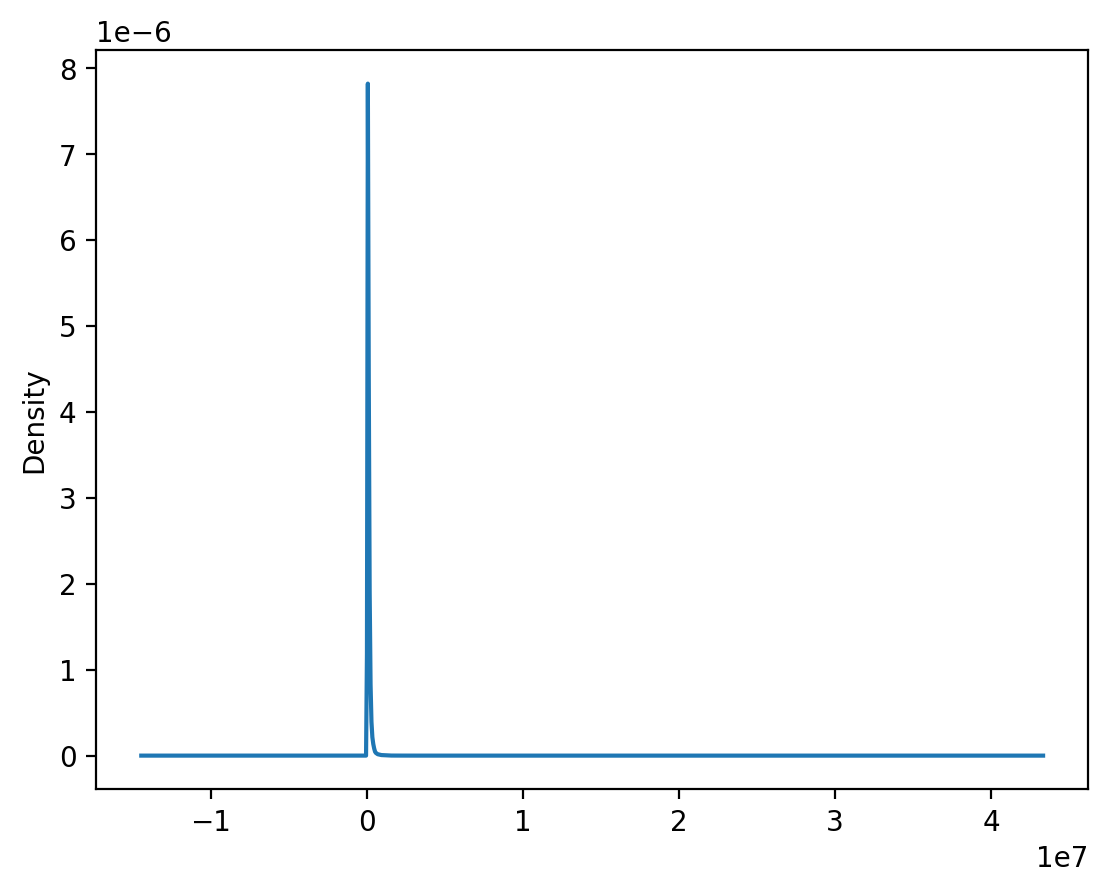

In [58]:
df.drop_duplicates(["ncodpers"], keep="last").renta.plot(kind="kde")

In [59]:
# для пользователей с доходом домохозяйства > 350000 сделаем значение = 350000, а затем nan значения заполним 25% квантилем
df["renta"][df["renta"] > 350000] = 350000
df["renta"][df["renta"].isna()] = df["renta"].quantile(q=0.25)

print(f"Новый размер выборки: {len(df)}")
print(f"Процент от исходного: {int(100*(len(df)/len_df))}%")

users_count = df["ncodpers"].nunique()

print(f"Кол-во уникальных пользователей: {users_count}")
print(f"Процент от числа взаимодействий: {int(100*(users_count/len(df)))}%")

/tmp/ipykernel_6465/1351474607.py:2: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  df["renta"][df["renta"] > 350000] = 350000
/tmp/ipykernel_6465/1351474607.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from

Новый размер выборки: 11765490
Процент от исходного: 86%
Кол-во уникальных пользователей: 827540
Процент от числа взаимодействий: 7%


<Axes: ylabel='Density'>

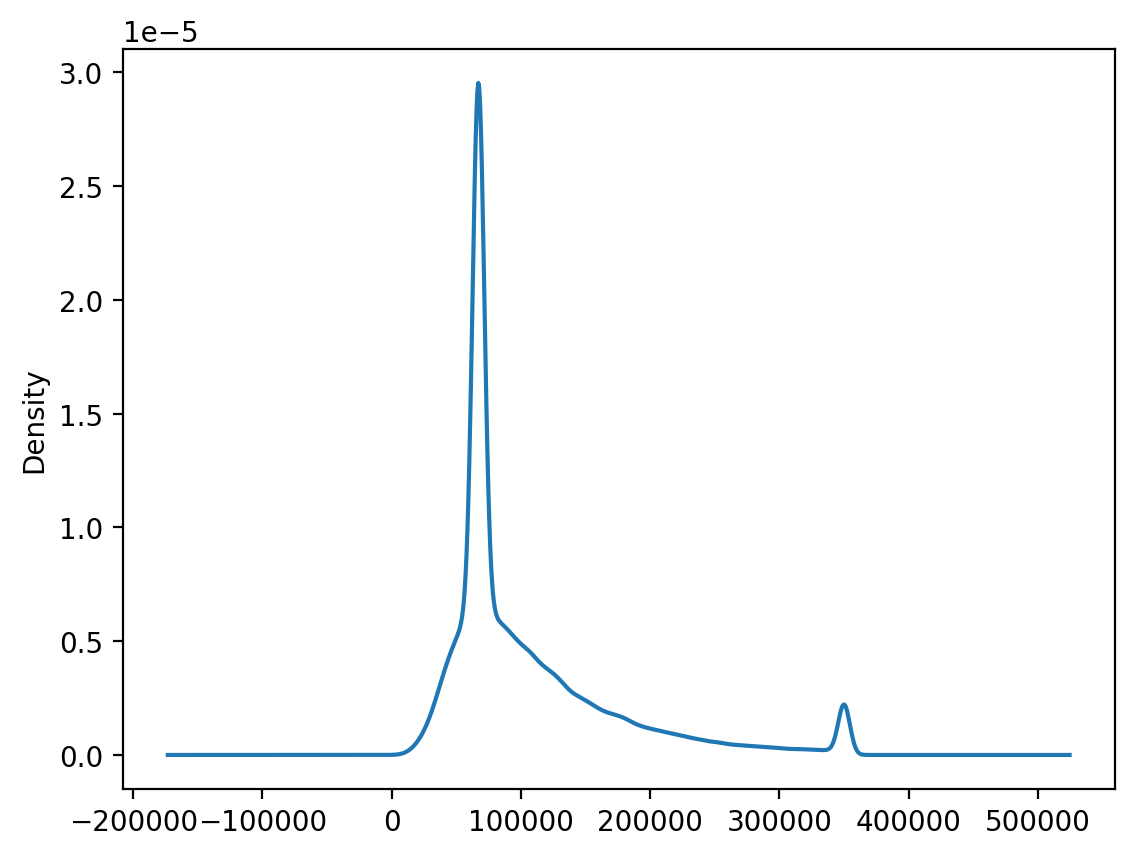

In [60]:
df.drop_duplicates(["ncodpers"], keep="last").renta.plot(kind="kde")

In [61]:
df.drop_duplicates(["ncodpers"], keep="last")["segmento"].value_counts()
# по этому признаку "Сегментация" выпускников колледжей больше всех, есть также пропуски

segmento
02 - PARTICULARES     441737
03 - UNIVERSITARIO    350412
01 - TOP               25656
Name: count, dtype: int64

In [62]:
# заполним эти значения строкой "NAN"
df["segmento"][df["segmento"].isna()] = "NAN"
df.drop_duplicates(["ncodpers"], keep="last")["segmento"].value_counts()

/tmp/ipykernel_6465/2255932817.py:2: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  df["segmento"][df["segmento"].isna()] = "NAN"
/tmp/ipykernel_6465/2255932817.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice f

segmento
02 - PARTICULARES     441737
03 - UNIVERSITARIO    350412
01 - TOP               25656
NAN                     9735
Name: count, dtype: int64

In [63]:
# По итогам анализа персональных данных пользователей статистика оставшихся данных выглядит так

print(f"Новый размер выборки: {len(df)}")
print(f"Процент от исходного: {int(100*(len(df)/len_df))}%")

users_count = df["ncodpers"].nunique()

print(f"Кол-во уникальных пользователей: {users_count}")
print(f"Процент от числа взаимодействий: {int(100*(users_count/len(df)))}%")

Новый размер выборки: 11765490
Процент от исходного: 86%
Кол-во уникальных пользователей: 827540
Процент от числа взаимодействий: 7%


In [64]:
# Портрет пользователя банка выглядит так:

# Безработный испанец(ка), живущий в Испании (большая вероятность, что из Мадрида).
# Возраст 25 лет (Выпускник колледжа, маленький стаж) и 50 лет (Обыкновенный, большой стаж).
# Доход 70,000.
# Пользуются продуктами банка больше 6 месяцев.
# Половина из них Активно пользуются банком, половина - неактивно.

# Были удалены колонки:

# ult_fec_cli_1t
# ind_empleado
# pais_residencia
# indrel
# indrel_1mes
# indresi
# conyuemp
# indfall
# tipodom
# tiprel_1mes

# проверим снова колонки на NaN значения - остались только колонки с банковсикми продуктами
df.columns[df.isna().any()].tolist()

['ind_nomina_ult1', 'ind_nom_pens_ult1']

In [65]:
# Теперь проанализируем данные по продуктам банка

# Создадим датафрейм с названием продуктов и их описанием для более удобного анализа
products_catalog_dict = {
    "names": bank_columns.to_list(),
    "describe": [
        "Сберегательный счёт",
        "Банковская гарантия",
        "Текущие счета",
        "Деривативный счёт",
        "Зарплатный проект",
        "Детский счёт",
        "Особый счёт 3",
        "Особый счёт",
        "Особый счёт 2",
        "Краткосрочный депозит",
        "Среднесрочный депозит",
        "Долгосрочный депозит",
        "Цифровой счёт",
        "Денежный средства",
        "Ипотека",
        "Пенсионный план",
        "Кредит",
        "Налоговый счёт",
        "Кредитная карта",
        "Ценные бумаги",
        "Домашний счёт",
        "Аккаунт для выплаты зарплаты",
        "Аккаунт для пенсионных обязательств",
        "Дебетовый аккаунт",
    ],
}
products_catalog = pd.DataFrame(data=products_catalog_dict)
products_catalog

,names,describe
0,ind_ahor_fin_ult1,Сберегательный счёт
1,ind_aval_fin_ult1,Банковская гарантия
2,ind_cco_fin_ult1,Текущие счета
3,ind_cder_fin_ult1,Деривативный счёт
4,ind_cno_fin_ult1,Зарплатный проект
5,ind_ctju_fin_ult1,Детский счёт
6,ind_ctma_fin_ult1,Особый счёт 3
7,ind_ctop_fin_ult1,Особый счёт
8,ind_ctpp_fin_ult1,Особый счёт 2
9,ind_deco_fin_ult1,Краткосрочный депозит


In [66]:
df_prod_info = (
    df[bank_columns]
    .sum()
    .reset_index(name="Total_Amount")
    .sort_values(by="Total_Amount", ascending=False)
    .merge(products_catalog, how="left", left_on="index", right_on="names")[
        ["names", "describe", "Total_Amount"]
    ]
)

df_prod_info["Events_Ratio"] = df_prod_info["Total_Amount"].apply(
    lambda x: round(x / len(df), 5)
)

df_prod_info["Unique_Users_Ratio"] = None

for i, j in enumerate(df_prod_info["names"]):
    df_prod_info["Unique_Users_Ratio"].iloc[i] = (
        df.groupby(j)["ncodpers"].nunique().reset_index()["ncodpers"][1] / users_count
    )

df_prod_info

# Самым популярным банковским продуктом является "Текущие счета".
# Его оформляли 7975656 раз, что составляет 68% из числа всех взаимодействий.
# А также 67% пользователей хотя бы раз пользовались этим продуктом.
# Наименее популярным продуктом является "Банковская гарантия".
# Его оформляли 299 раз, что составляет всего 0.003% из числа всех взаимодействий.

/tmp/ipykernel_6465/3621001727.py:18: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  df_prod_info["Unique_Users_Ratio"].iloc[i] = (
/tmp/ipykernel_6465/3621001727.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slic

,names,describe,Total_Amount,Events_Ratio,Unique_Users_Ratio
0,ind_cco_fin_ult1,Текущие счета,7975656.0,0.67789,0.673607
1,ind_recibo_ult1,Дебетовый аккаунт,1586567.0,0.13485,0.173798
2,ind_ctop_fin_ult1,Особый счёт,1263265.0,0.10737,0.094045
3,ind_cno_fin_ult1,Зарплатный проект,1003564.0,0.08530,0.094562
4,ind_ecue_fin_ult1,Цифровой счёт,933794.0,0.07937,0.081835
5,ind_nom_pens_ult1,Аккаунт для пенсионных обязательств,730817.0,0.06212,0.0836
6,ind_nomina_ult1,Аккаунт для выплаты зарплаты,714905.0,0.06076,0.081626
7,ind_reca_fin_ult1,Налоговый счёт,625718.0,0.05318,0.049517
8,ind_tjcr_fin_ult1,Кредитная карта,532712.0,0.04528,0.062304
9,ind_ctpp_fin_ult1,Особый счёт 2,494057.0,0.04199,0.037602


In [67]:
# Добавим в эту таблицу соотношения продуктов по полу, возрасту и активности
df_prod_info["age_lt38_ratio"] = None
df_prod_info["sexo_H_ratio"] = None
df_prod_info["active_users_ratio"] = None

for i, j in enumerate(df_prod_info["names"]):

    try:
        df_temp_1 = df[df["age"] < 38].groupby(j)["ncodpers"].count()[1]
    except:
        df_temp_1 = 0
    try:
        df_temp_2 = df[df["age"] >= 38].groupby(j)["ncodpers"].count()[1]
    except:
        df_temp_2 = 0
    df_prod_info["age_lt38_ratio"].iloc[i] = round(
        df_temp_1 / (df_temp_1 + df_temp_2), 2
    )

    try:
        df_temp_1 = df[df["sexo"] == "H"].groupby(j)["ncodpers"].count()[1]
    except:
        df_temp_1 = 0
    try:
        df_temp_2 = df[df["sexo"] == "V"].groupby(j)["ncodpers"].count()[1]
    except:
        df_temp_2 = 0
    df_prod_info["sexo_H_ratio"].iloc[i] = round(df_temp_1 / (df_temp_1 + df_temp_2), 2)

    try:
        df_temp_1 = (
            df[df["ind_actividad_cliente"] == 1].groupby(j)["ncodpers"].count()[1]
        )
    except:
        df_temp_1 = 0
    try:
        df_temp_2 = (
            df[df["ind_actividad_cliente"] == 0].groupby(j)["ncodpers"].count()[1]
        )
    except:
        df_temp_2 = 0
    df_prod_info["active_users_ratio"].iloc[i] = round(
        df_temp_1 / (df_temp_1 + df_temp_2), 2
    )

df_prod_info

/tmp/ipykernel_6465/1322225124.py:16: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  df_prod_info["age_lt38_ratio"].iloc[i] = round(
/tmp/ipykernel_6465/1322225124.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a sli

,names,describe,Total_Amount,Events_Ratio,Unique_Users_Ratio,age_lt38_ratio,sexo_H_ratio,active_users_ratio
0,ind_cco_fin_ult1,Текущие счета,7975656.0,0.67789,0.673607,0.61,0.48,0.51
1,ind_recibo_ult1,Дебетовый аккаунт,1586567.0,0.13485,0.173798,0.32,0.4,0.99
2,ind_ctop_fin_ult1,Особый счёт,1263265.0,0.10737,0.094045,0.09,0.37,0.71
3,ind_cno_fin_ult1,Зарплатный проект,1003564.0,0.08530,0.094562,0.32,0.41,0.99
4,ind_ecue_fin_ult1,Цифровой счёт,933794.0,0.07937,0.081835,0.23,0.38,0.93
5,ind_nom_pens_ult1,Аккаунт для пенсионных обязательств,730817.0,0.06212,0.0836,0.29,0.42,1.0
6,ind_nomina_ult1,Аккаунт для выплаты зарплаты,714905.0,0.06076,0.081626,0.29,0.42,1.0
7,ind_reca_fin_ult1,Налоговый счёт,625718.0,0.05318,0.049517,0.19,0.35,0.93
8,ind_tjcr_fin_ult1,Кредитная карта,532712.0,0.04528,0.062304,0.14,0.35,0.99
9,ind_ctpp_fin_ult1,Особый счёт 2,494057.0,0.04199,0.037602,0.13,0.39,0.84


In [68]:
# Теперь выявим "холодных" пользователей - тех, у кого нет продуктов.
# Заполним сначала пустые значения нулями и переведем в тип int
df[bank_columns] = df[bank_columns].fillna(0)
df[bank_columns] = df[bank_columns].astype(int)

df["prod_count"] = df[bank_columns].sum(axis=1)
len_cold_all = len(df[df["prod_count"] == 0])
print(f"Число холодных пользователей в разные моменты времени: {len_cold_all}")

df_last_month = df.drop_duplicates(["ncodpers"], keep="last")
len_cold_last_month = len(df_last_month[df_last_month["prod_count"] == 0])
print(f"Число холодных пользователей в последний месяц: {len_cold_last_month}")

Число холодных пользователей в разные моменты времени: 2138573
Число холодных пользователей в последний месяц: 214548


# Выводы

По результатам знакомства с данными обнаружились следующие проблемы:

 - признаки с большим кол-вом пустых значений:
     - "Последняя дата, когда клиент был премиальным" - удалили колонку
     - "conyuemp - 1, если клиент супруг(а) работника" - удалили колонку

 - колонки преимущественно только с одним значением:
    - "Статус занятости: N — безработный" - удалили колонку
    - "Страна резидентства: ES" - удалили колонку
    - "indrel: 1 — первичный клиент" - удалили колонку
    - "Тип клиента в начале месяца: 1 — премиальный" - удалили колонку
    - "Если страна проживания совпадает со страной банка: S" - удалили колонку
    - "Индекс актуальности счёта (англ. Deceased index, N/S): N" - удалили колонку
    - "Тип адреса (1 — основной адрес): 1" - удалили колонку

 - нереалистичные значения по признакам по признакам:
    - "Возраст" - оставили пользователей с возрастом от 18 до 60 лет, также убрали пользователей, у которых пол не указан.
    - "Стаж клиента" - оставили пользователей со стажем >= 0.
    - "Доход домохозяйства" - для пользователей с доходом домохозяйства > 350000 сделали значение = 350000, а nan значения заполним 25% квантилем.

  - также удалена колонка "tiprel_1mes - Тип клиента в начале месяца", т.к. уже есть похожий признак "Активность пользователя (1 — активный, 0 — неактивный)".

Оставшийся объем 86% от исходного.
 - Кол-во уникальных пользователей: вначале 956645, после обработки - 827540.
 - Процент уникальных пользователей от числа взаимодействий: 7%.
 - Всего 17 месяцев, значит, в среднем в месяц пользователи взаимодействовали с банком ~800 тыс раз.
 - Выявлено холодных пользователей в разные моменты времени: 2138573
 - Число холодных пользователей в последний месяц: 214548

Портрет пользователя банка:
 - Безработный испанец(ка), живущий в Испании (большая вероятность, что из Мадрида). 
 - Возраст 25 лет (Выпускник колледжа, маленький стаж) и 50 лет (Обыкновенный, большой стаж). 
 - Доход 70,000.
 - Пользуются продуктами банка больше 6 месяцев.
 - Половина из них Активно пользуются банком, половина - неактивно.

По популярности банковских продуктов:
 - Самым массовым банковским продуктом является "Текущие счета". Его оформляли 7975656 раз, что составляет 68% из числа всех взаимодействий. 
 - Также 67% пользователей хотя бы раз пользовались этим продуктом.
 - Возраст пользователя, который пользуется этим продуктом: небольшой перевес в сторону молодого поколения (61%). 
 - По полу и активности - одинаково.

 - Наименее популярным продуктом является "Банковская гарантия". 
  Его оформляли 299 раз, что составляет всего 0.003% из числа всех взаимодействий.

Еще наблюдения:
 - молодое поколение опережает старшее поколение только по продуктам "Текущие счета" и "Детский счёт".
 - Пол V опережает по доле использования по всем продуктам другой пол H (особенно сильный разрыв по продукту "Деривативный счёт" (89%)). 
 - Продукты, которые пользуются только активными пользователями - "Аккаунт для пенсионных обязательств", "Аккаунт для выплаты зарплаты", "Долгосрочный депозит", "Ипотека", "Среднесрочный депозит" и "Банковская гарантия".


# EDA

Динамика пользователей и событий по месяцам

In [69]:
# построим агрегаты в виде датафрейма

interactions_by_month = (
    df.groupby("fecha_dato")
    .agg(
        events=("fecha_dato", "count"),
        new_user_num=("prod_count", lambda x: sum(x == 0)),
        old_user_num=("prod_count", lambda x: sum(x > 0)),
        ind_ahor_fin_ult1=("ind_ahor_fin_ult1", "sum"),
        ind_aval_fin_ult1=("ind_aval_fin_ult1", "sum"),
        ind_cco_fin_ult1=("ind_cco_fin_ult1", "sum"),
        ind_cder_fin_ult1=("ind_cder_fin_ult1", "sum"),
        ind_cno_fin_ult1=("ind_cno_fin_ult1", "sum"),
        ind_ctju_fin_ult1=("ind_ctju_fin_ult1", "sum"),
        ind_ctma_fin_ult1=("ind_ctma_fin_ult1", "sum"),
        ind_ctop_fin_ult1=("ind_ctop_fin_ult1", "sum"),
        ind_ctpp_fin_ult1=("ind_ctpp_fin_ult1", "sum"),
        ind_deco_fin_ult1=("ind_deco_fin_ult1", "sum"),
        ind_deme_fin_ult1=("ind_deme_fin_ult1", "sum"),
        ind_dela_fin_ult1=("ind_dela_fin_ult1", "sum"),
        ind_ecue_fin_ult1=("ind_ecue_fin_ult1", "sum"),
        ind_fond_fin_ult1=("ind_fond_fin_ult1", "sum"),
        ind_hip_fin_ult1=("ind_hip_fin_ult1", "sum"),
        ind_plan_fin_ult1=("ind_plan_fin_ult1", "sum"),
        ind_pres_fin_ult1=("ind_pres_fin_ult1", "sum"),
        ind_reca_fin_ult1=("ind_reca_fin_ult1", "sum"),
        ind_tjcr_fin_ult1=("ind_tjcr_fin_ult1", "sum"),
        ind_valo_fin_ult1=("ind_valo_fin_ult1", "sum"),
        ind_viv_fin_ult1=("ind_viv_fin_ult1", "sum"),
        ind_nomina_ult1=("ind_nomina_ult1", "sum"),
        ind_nom_pens_ult1=("ind_nom_pens_ult1", "sum"),
        ind_recibo_ult1=("ind_recibo_ult1", "sum"),
    )
    .reset_index()
)
interactions_by_month

,fecha_dato,events,new_user_num,old_user_num,ind_ahor_fin_ult1,ind_aval_fin_ult1,ind_cco_fin_ult1,ind_cder_fin_ult1,ind_cno_fin_ult1,ind_ctju_fin_ult1,...,ind_hip_fin_ult1,ind_plan_fin_ult1,ind_pres_fin_ult1,ind_reca_fin_ult1,ind_tjcr_fin_ult1,ind_valo_fin_ult1,ind_viv_fin_ult1,ind_nomina_ult1,ind_nom_pens_ult1,ind_recibo_ult1
0,2015-01-28,533120,12351,520769,83,18,430520,236,53055,1505,...,4621,6195,1811,32342,31306,15944,3100,37163,38358,86428
1,2015-02-28,535841,12402,523439,84,19,431757,237,54195,1453,...,4615,6183,1805,32543,30219,15912,3088,38886,39776,85593
2,2015-03-28,538271,12514,525757,84,20,432715,249,55180,1405,...,4605,6174,1807,32745,30722,15781,3068,41100,41338,88127
3,2015-04-28,539998,12512,527486,82,20,433186,248,56357,1357,...,4591,6171,1813,33575,31619,15719,3050,40635,41557,89271
4,2015-05-28,542114,12540,529574,80,20,434249,247,57559,1306,...,4444,6168,1807,33896,31509,15755,3035,39637,39848,87647
5,2015-06-28,543824,12526,531298,78,20,438737,251,54309,1244,...,4411,6175,1784,36488,32169,15540,3019,41770,42714,89663
6,2015-07-28,712614,170284,542330,77,18,448415,254,56037,1188,...,4402,6170,1769,37052,32781,15583,3008,43182,44537,90874
7,2015-08-28,725192,170822,554370,77,18,458942,257,57372,1163,...,4385,6157,1768,37254,32501,15763,2990,41080,42070,87194
8,2015-09-28,746496,176570,569926,76,18,473284,255,58094,1155,...,4375,6147,1765,37442,31993,15931,2972,41930,42927,91524
9,2015-10-28,772222,185985,586237,75,17,488700,253,59590,1161,...,4358,6137,1760,37929,31726,16477,2948,42800,43789,95054


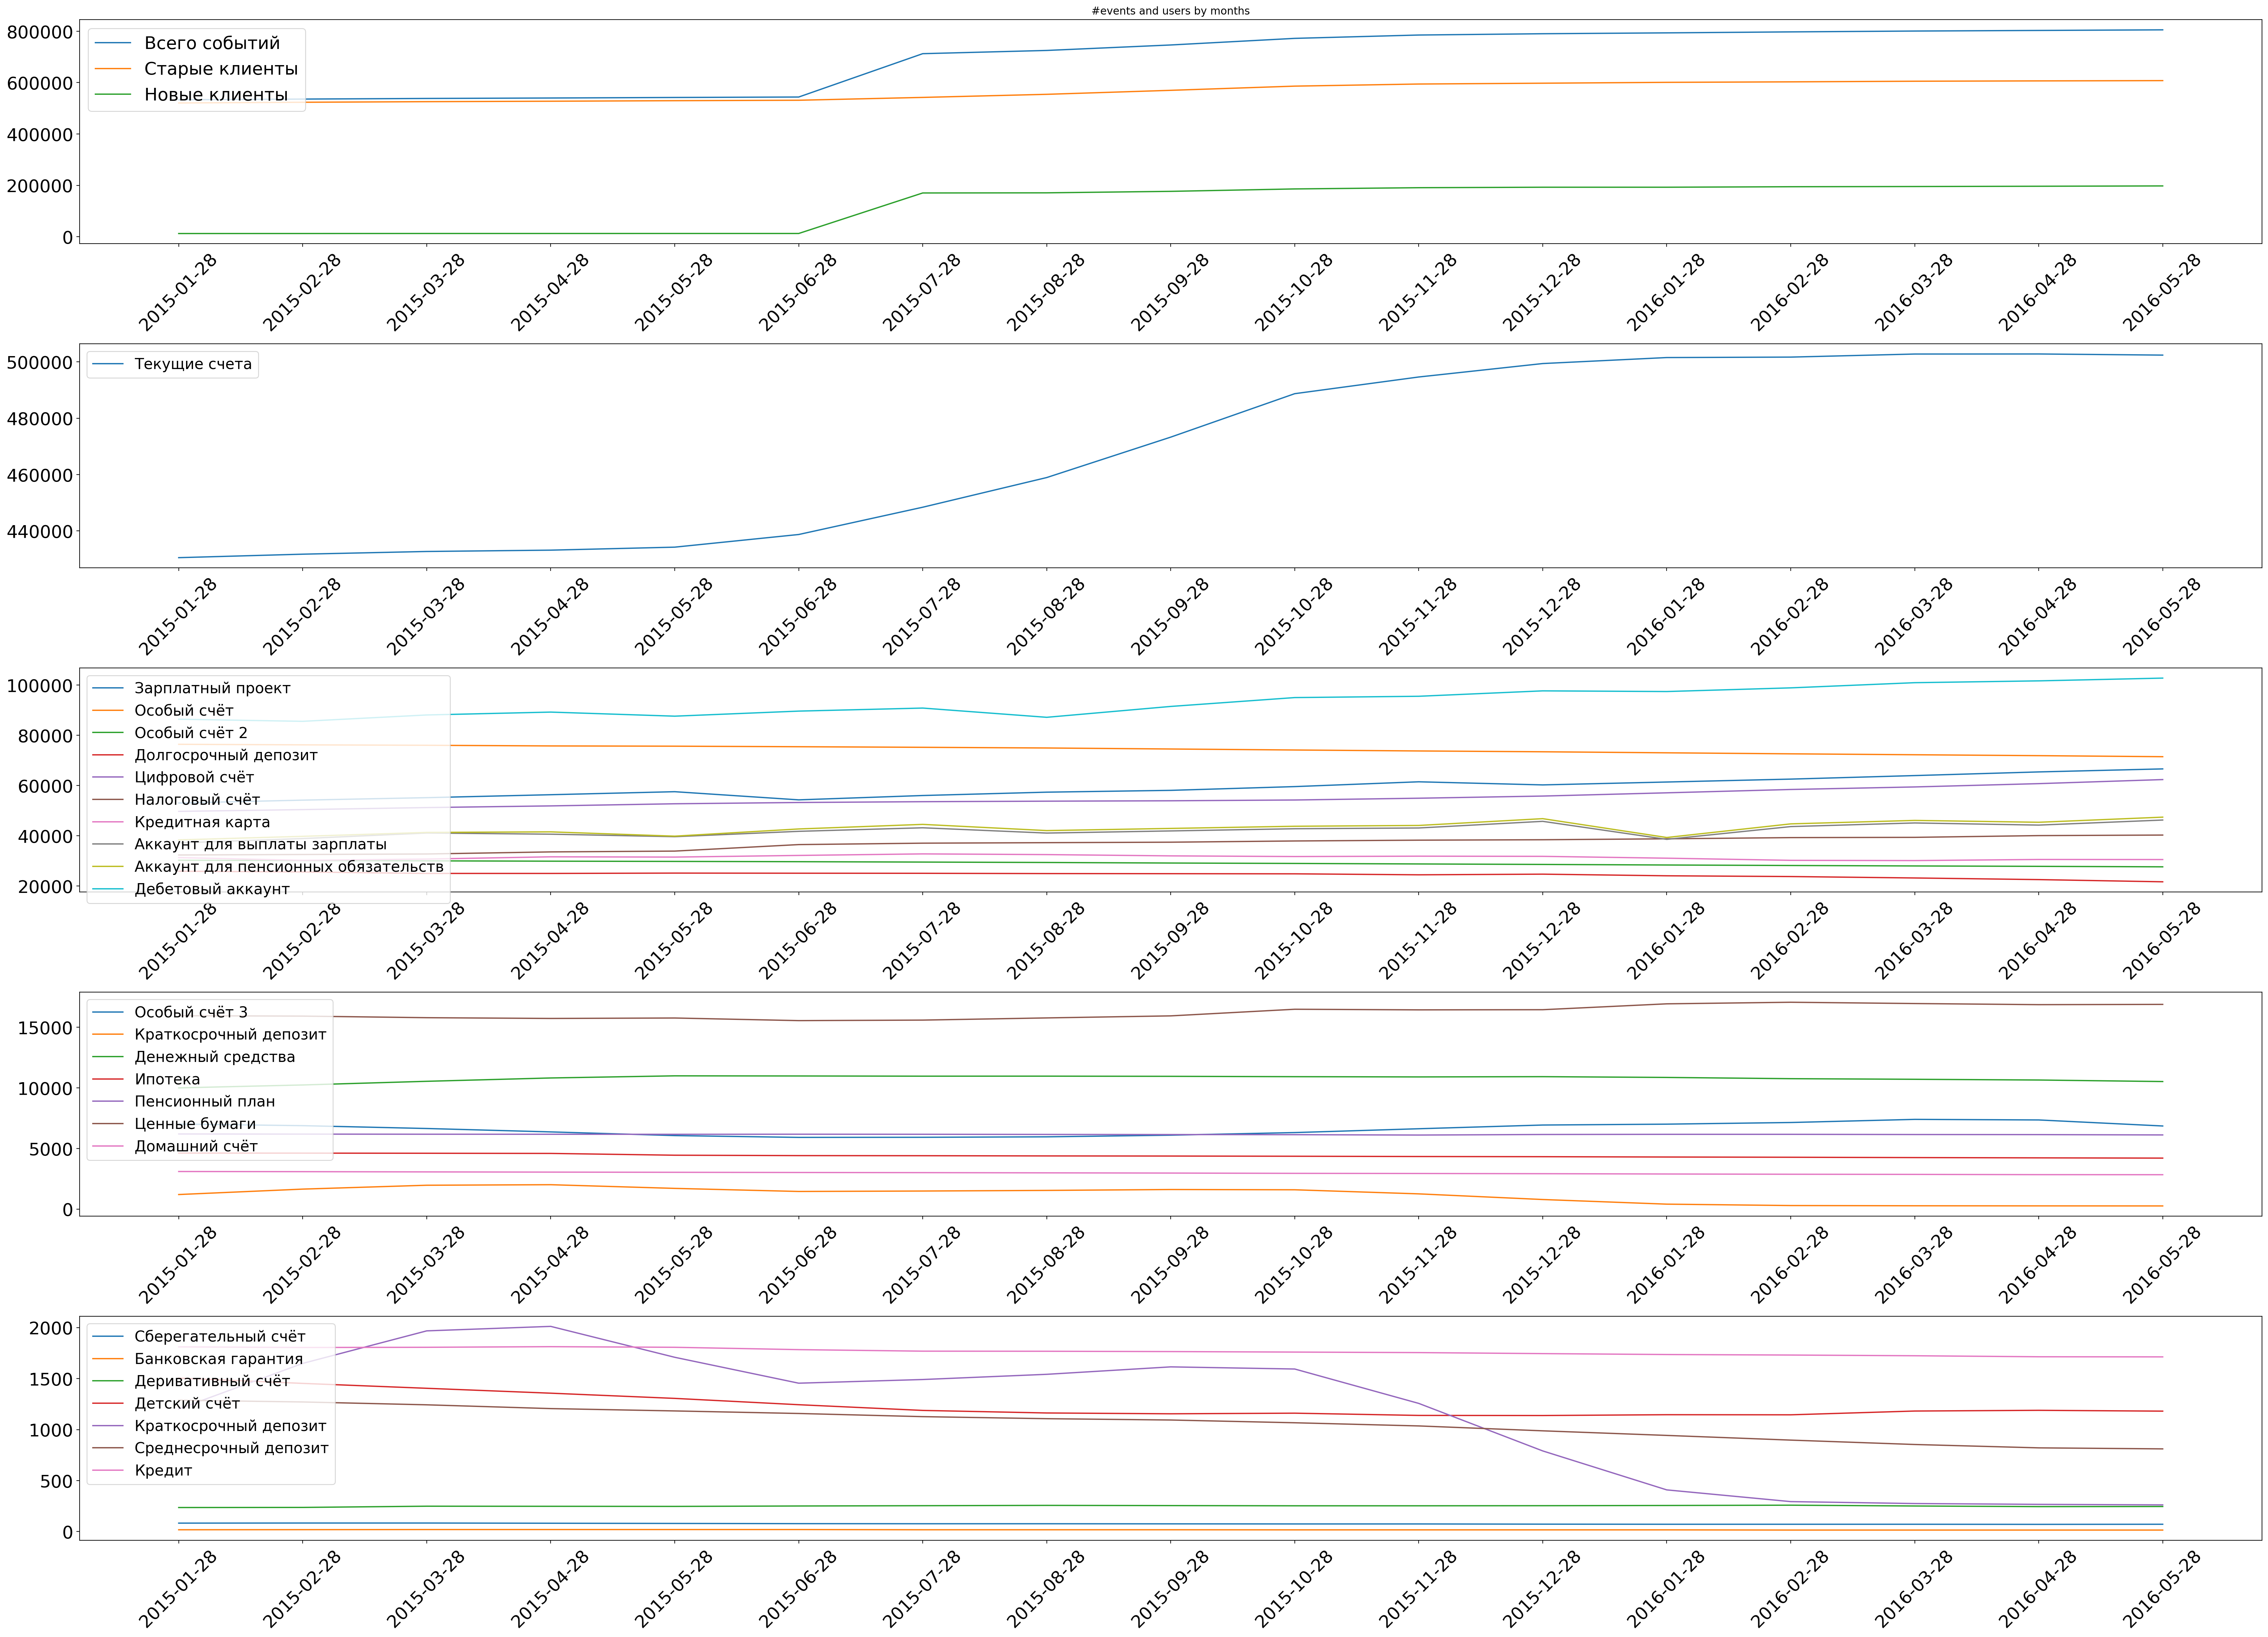

In [70]:
# Построим графики пользователей популярности продуктов по месяцам.

# Графики по продуктам разделим на группы:

#  - макс кол-во событий > 200000
#  - 20000 < макс кол-во событий <= 200000
#  - 2000 < макс кол-во событий <= 20000
#  - макс кол-во событий <= 2000

fig, axs = plt.subplots(5, 1, figsize=(36, 26))

ax = axs[0]
ax.plot(interactions_by_month["fecha_dato"], interactions_by_month["events"])
ax.plot(interactions_by_month["fecha_dato"], interactions_by_month["old_user_num"])
ax.plot(interactions_by_month["fecha_dato"], interactions_by_month["new_user_num"])
ax.set_title("#events and users by months")
ax.legend(
    ["Всего событий", "Старые клиенты", "Новые клиенты"], loc=2, prop={"size": 20}
)
ax.tick_params(axis="x", rotation=45, labelsize=20)
ax.tick_params(axis="y", labelsize=20)

int_group1 = interactions_by_month[products_catalog["names"]].columns[
    (interactions_by_month[products_catalog["names"]].gt(200000)).any()
]
int_group1_des = products_catalog[products_catalog["names"].isin(int_group1)][
    "describe"
].to_list()

int_group2 = interactions_by_month[products_catalog["names"]].columns[
    (
        interactions_by_month[products_catalog["names"]].gt(20000)
        & interactions_by_month[products_catalog["names"]].le(200000)
    ).any()
]
int_group2_des = products_catalog[products_catalog["names"].isin(int_group2)][
    "describe"
].to_list()

int_group3 = interactions_by_month[products_catalog["names"]].columns[
    (
        interactions_by_month[products_catalog["names"]].gt(2000)
        & interactions_by_month[products_catalog["names"]].le(20000)
    ).any()
]
int_group3_des = products_catalog[products_catalog["names"].isin(int_group3)][
    "describe"
].to_list()

int_group4 = interactions_by_month[products_catalog["names"]].columns[
    (interactions_by_month[products_catalog["names"]].le(2000)).any()
]
int_group4_des = products_catalog[products_catalog["names"].isin(int_group4)][
    "describe"
].to_list()

ax = axs[1]
for i in int_group1.to_list():
    ax.plot(interactions_by_month["fecha_dato"], interactions_by_month[i])
ax.legend(int_group1_des, loc=2, prop={"size": 17})
ax.tick_params(axis="x", rotation=45, labelsize=20)
ax.tick_params(axis="y", labelsize=20)

ax = axs[2]
for i in int_group2.to_list():
    ax.plot(interactions_by_month["fecha_dato"], interactions_by_month[i])
ax.legend(int_group2_des, loc=2, prop={"size": 17})
ax.tick_params(axis="x", rotation=45, labelsize=20)
ax.tick_params(axis="y", labelsize=20)

ax = axs[3]
for i in int_group3.to_list():
    ax.plot(interactions_by_month["fecha_dato"], interactions_by_month[i])
ax.legend(int_group3_des, loc=2, prop={"size": 17})
ax.tick_params(axis="x", rotation=45, labelsize=20)
ax.tick_params(axis="y", labelsize=20)

ax = axs[4]
for i in int_group4.to_list():
    ax.plot(interactions_by_month["fecha_dato"], interactions_by_month[i])
ax.legend(int_group4_des, loc=2, prop={"size": 17})
ax.tick_params(axis="x", rotation=45, labelsize=20)
ax.tick_params(axis="y", labelsize=20)

fig.tight_layout()
# Число событий резко возросло в июле 2015 года - виден резкий скачок.
# Это объясняется большим наплывом новых пользователей.
# По продуктам, популярность более-менее ровная у всех, кроме продукта "Текущие счета" и "Краткосрочные депозиты".
# Популярность самого массового продукта "Текущие счета" плавно увеличивается с мая 2015 до января 2016.
# Наблюдается падение популярности "Краткосрочных депозитов" на самом нижнем графике.

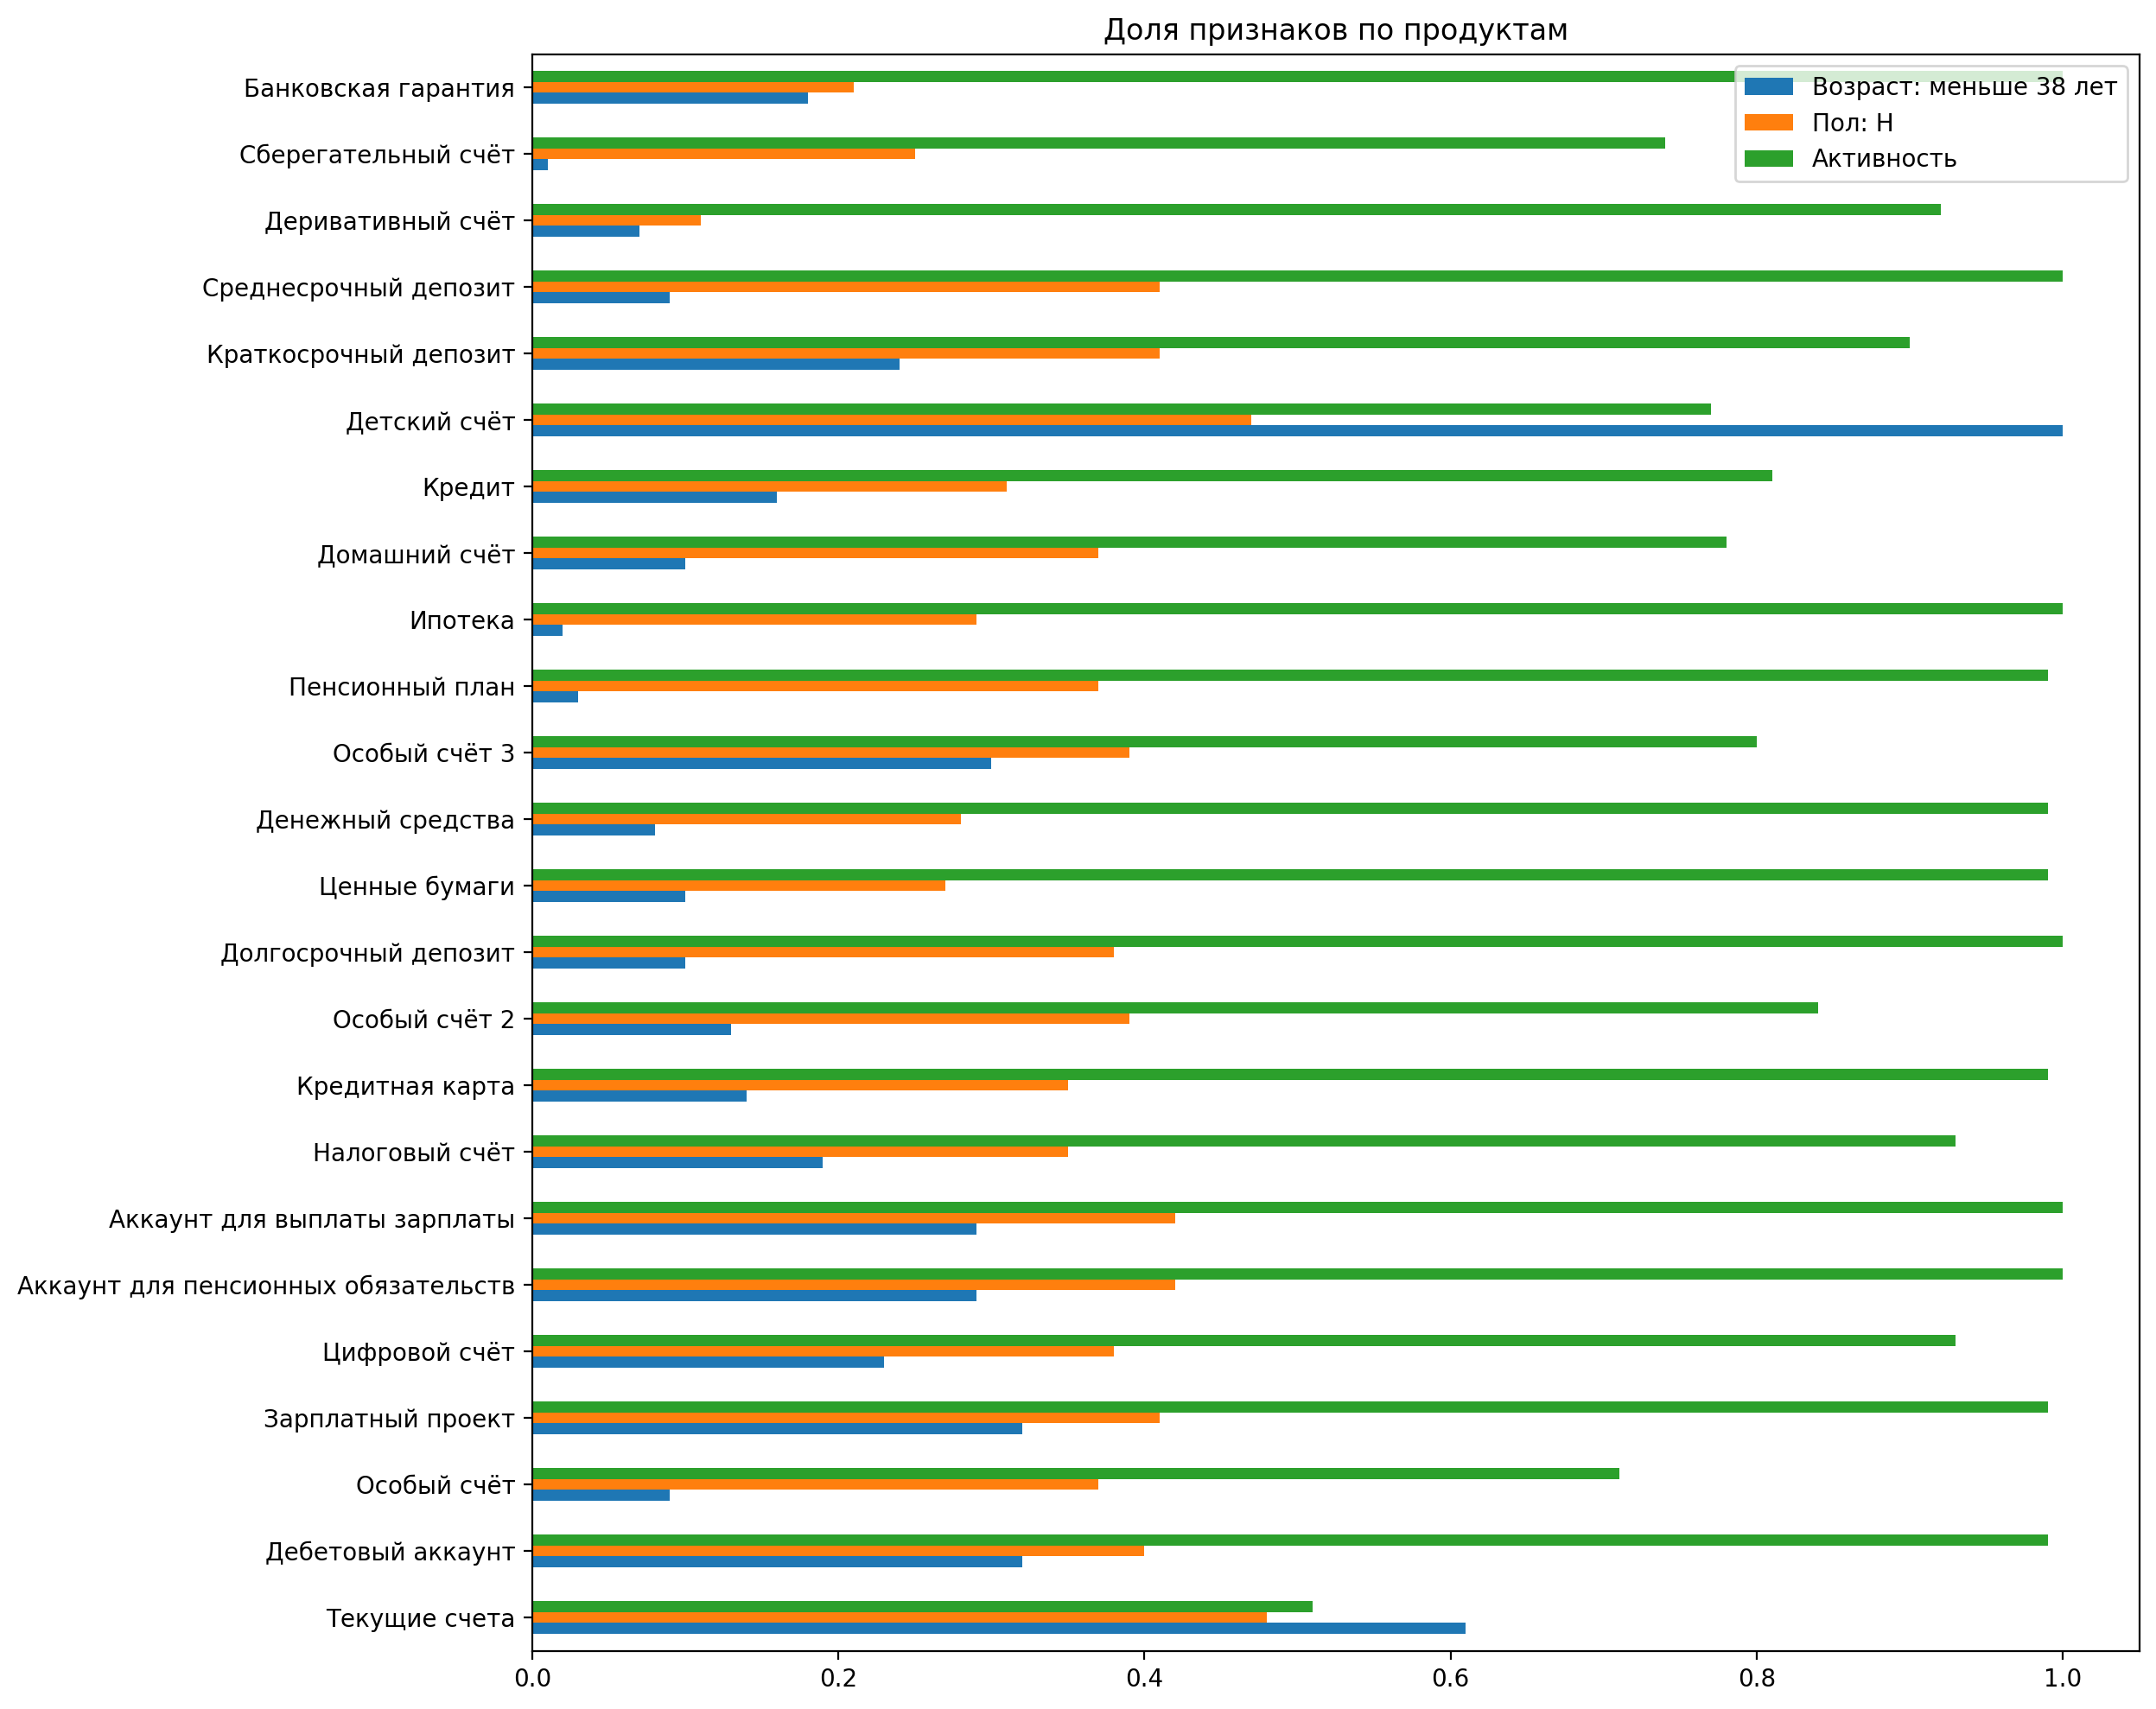

In [71]:
# Визуализируем для наглядности таблицу соотношения продуктов по полу, возрасту и активности df_prod_info
ax = df_prod_info[["age_lt38_ratio", "sexo_H_ratio", "active_users_ratio"]].plot(
    kind="barh",
    figsize=(12, 12),
    title="Доля признаков по продуктам",
)
ax.set_yticklabels(df_prod_info["describe"].to_list())
ax.legend(["Возраст: меньше 38 лет", "Пол: H", "Активность"], loc=1)

# Молодое поколение опережает старшее поколение только по продуктам "Текущие счета" и "Детский счёт".
# Примерное равенство полов только по продуктам "Текущие счета" и "Детский счёт".
# Пол V опережает по доле использования по всем продуктам другой пол H (особенно сильный разрыв по продукту "Деривативный счёт" (89%)).
# Почти все продукты используются активными пользователями.

Text(0.5, 0, 'Возраст, лет')

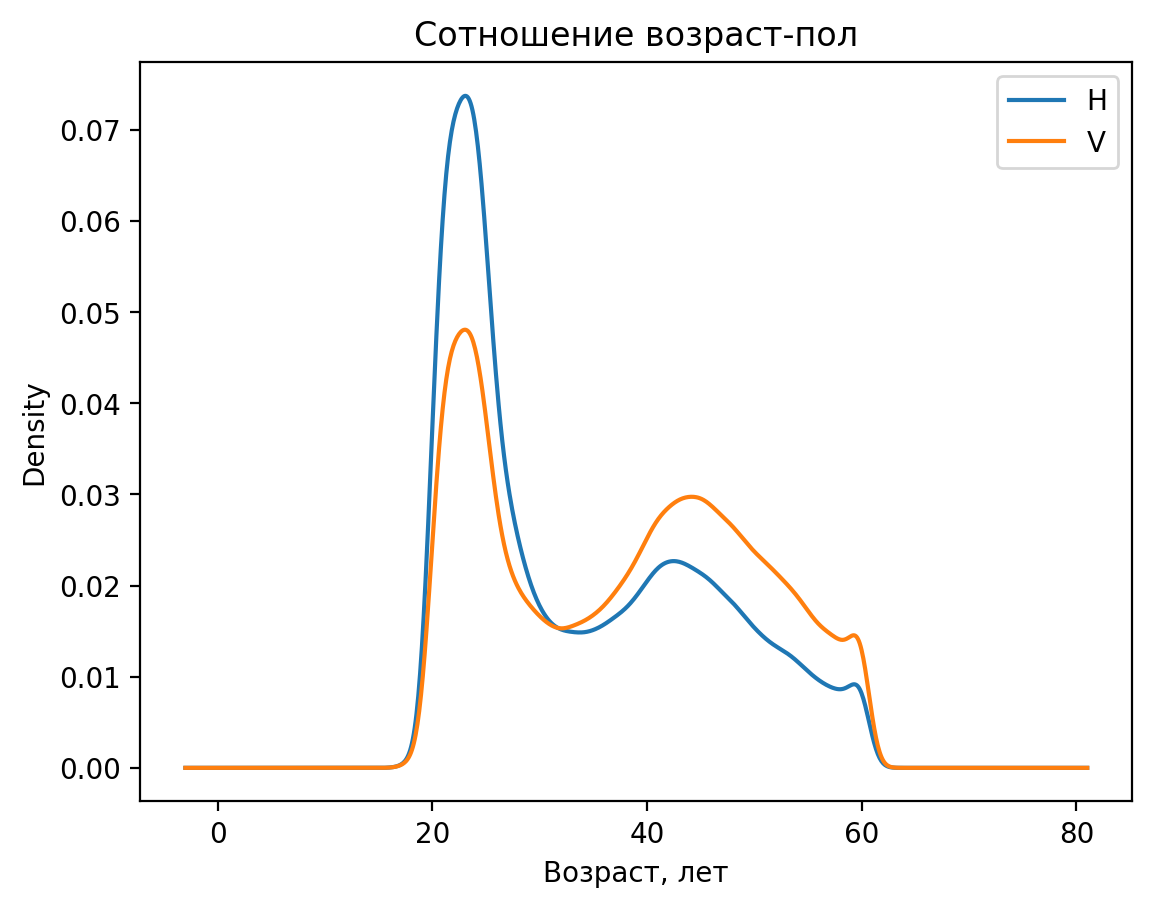

In [72]:
# проверим распределение клиентов по возрасту и полу
df.drop_duplicates(["ncodpers"], keep="last").groupby("sexo").age.plot(
    kind="kde", title="Сотношение возраст-пол", legend=True
)
plt.xlabel("Возраст, лет")
# доля пола меняется с возрастом

Text(0.5, 0, 'Возраст, лет')

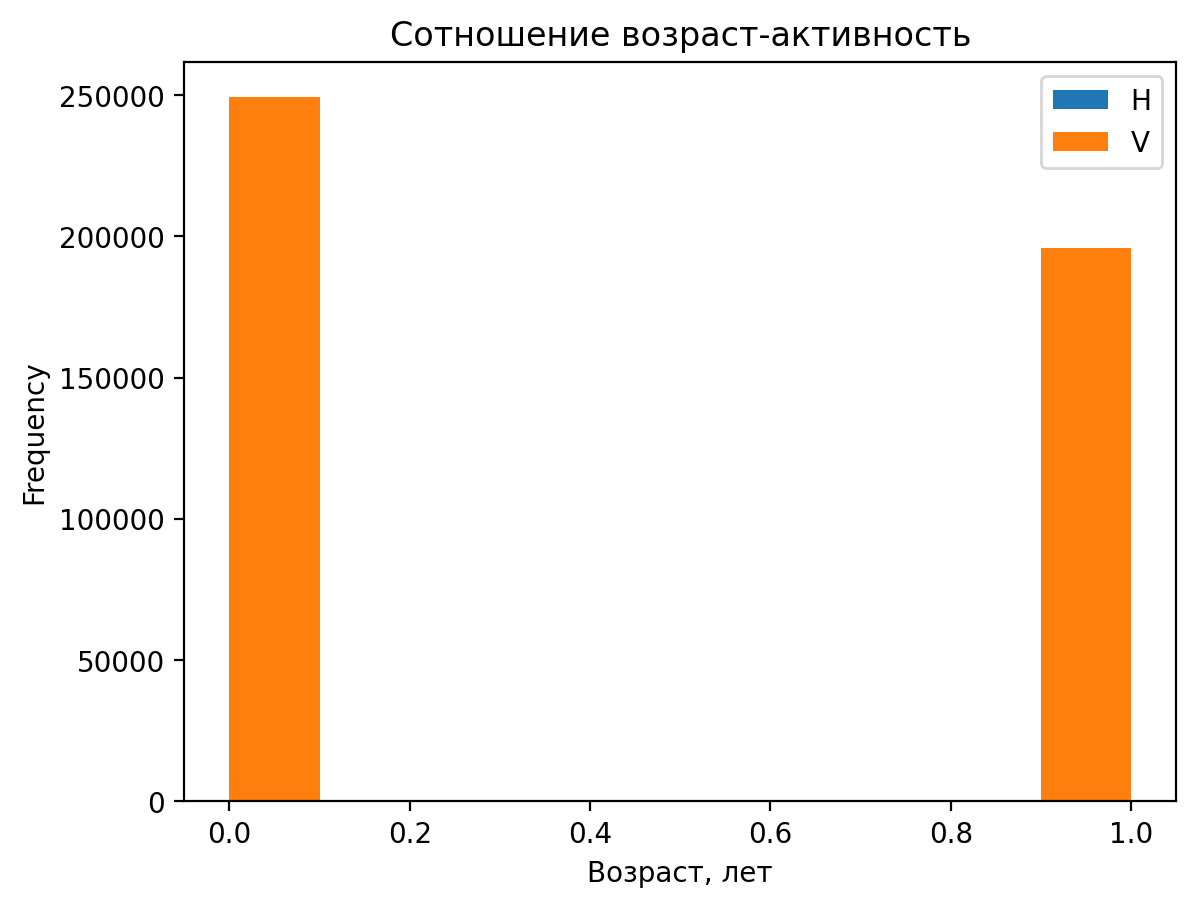

In [73]:
# проверим распределение клиентов по активности и полу
df.drop_duplicates(["ncodpers"], keep="last").groupby(
    "sexo"
).ind_actividad_cliente.plot(
    kind="hist", title="Сотношение возраст-активность", legend=True
)
plt.xlabel("Возраст, лет")
# примерно одинаково

Text(0.5, 0, 'Кол-во лет')

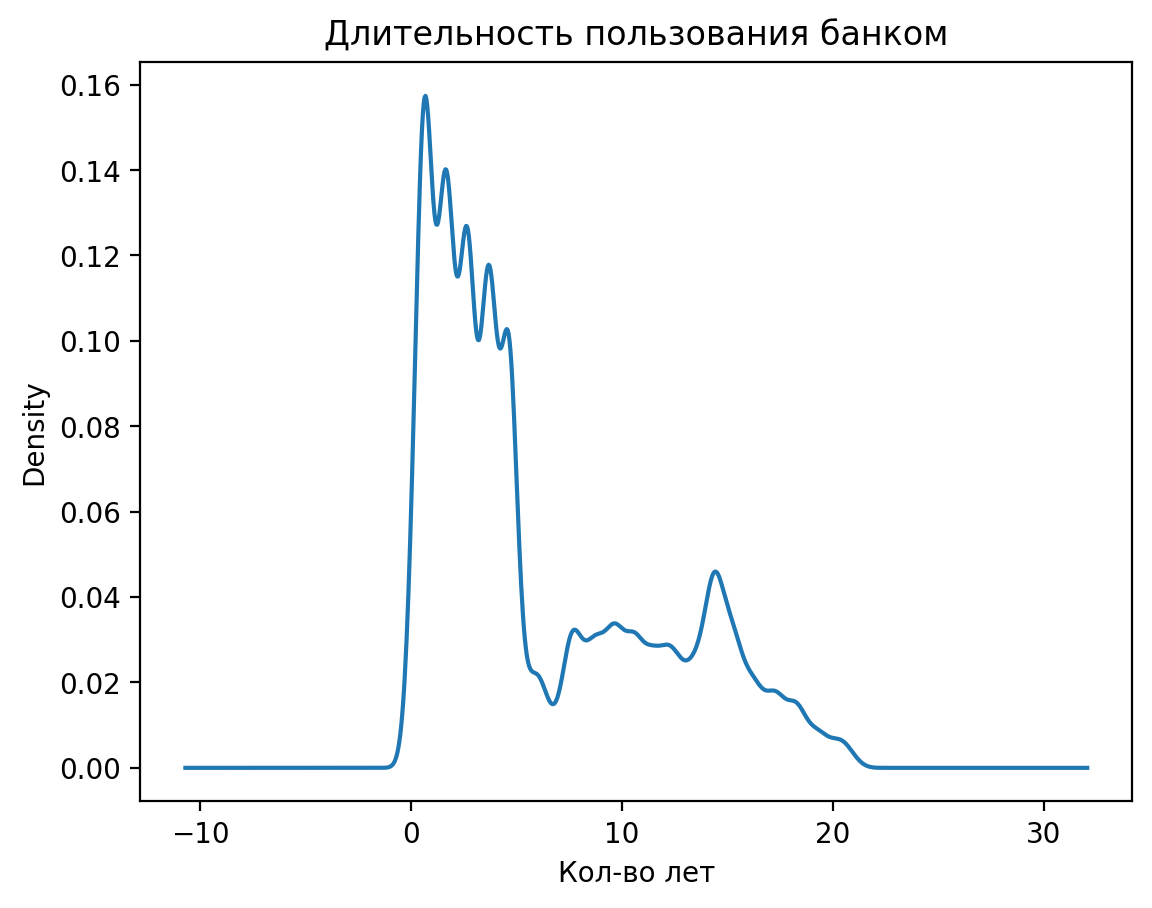

In [106]:
# Теперь проверим распределение по длительности пользования банковскими продуктами (с момента заключения договора)

# добавим колонку using_days - кол-во дней взаимодействия с банком
df["using_days"] = pd.to_datetime(df["fecha_dato"]) - pd.to_datetime(df["fecha_alta"])
df["using_days"] = df["using_days"].apply(lambda x: x.days / 365)

df.drop_duplicates(["ncodpers"], keep="last").using_days.plot(
    kind="kde", title="Длительность пользования банком"
)
plt.xlabel("Кол-во лет")
# В основном, все пользователи являются клиентами банка в течение до 5 лет